**Summary**

***About all corpora***
- Division into 80% training and 20% test set because some corpora, especially RIDGES, might not be big enough to justify a separate validation set. Instead, bootstrapping for sampling a validation set might be more suitable for them, and for bigger sets, a validation set can be sampled from the training set.

***The order in which I will start working with the corpora:***
1. DTA: No preprocessing except binning and maybe normalization, no NAs in the variable "year"

2. CLMET: Some NAs in year, but no NAs in the variable "decade", so that I only have to cut of the "s" to have some numeric values to work with

3. ARCHER: Some NAs in "Years", but it might be possible to predict them, and if not, these rows can be dropped without loosing to much data. An open issue is that the xml-encoding puts the TEI-header into the text when I try to extract the main text without any meta data.

4. GerManC: It is a large corpus, but contains many systemic errors. Some of these errors can be fixed easily with preprocessing, other errors require to drop the whole row, which should not result in a large data loss.

5. CEEMT: Smaller, very specialised corpus that contains medical texts. It has no NAs in the meta data. The main problem is that it includes several versions of some documents, and some of the documents are comments written in modern English.

6. RIDGES: Very small corpus with no NAs, but it contains only 23 documents (medical texts) which are spread over  four centuries, so it is not a representative collection for anything, and needs to be paired with one of the two larger German corpora. Another problem is that RIDGES is only downloadable in specialized formats, e.g. CoNLL and Paula, so reading it into a csv-file is more difficult than with a txt- or xml- file

In [1]:
library(dplyr)
library(tidyr)
library(ggplot2) 
#This cell may throw a warning, because one of the packages does override objects from a base package.
#The warning can be ignored, because the base object would not be needed in this analysis


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In the following cell, the details about splitting each corpus into a train, test, and validation set are loaded into several data frames to make them available for a more detailed analysis of the numbers. The numbers were given as output by the script for splitting the data sets.

The DBB data set was not split since it does not contain historical full text data, it contains only specialised data about German morphology at different historical stages. This data is very valuable for training, but it does not provide any additional value for evaluating the performance.

The GerManc corpus is stored in seven different folders, according to the seven genres represented by the corpus. Each genre was split separately due to the fact that the splitting script was not prepared to handle a corpus stored in six folders. Additionally, I do not know yet why the GerManc was stored this way; splitting it in any other way would possibly lead to the loss of valuable information.

Splitting each corpus, and in the case of the GerManc Corpus, each genre seperately, also leads to a higher probability of having representative data sets [cf. Gerond2017, p. 51, "stratified sampling"].

In [2]:
CLMET <- data.frame("corpus"='CLMET',"all_docs"= 333, "train"= 266, "validation"= 34, "test"=33, "lang"='EN', "start"= 1710, "end"=1920)
DTA <- data.frame("corpus"='DTA',"all_docs"= 1406, "train"= 1124, "validation"= 141, "test"=141, "lang"='DE', "start"=1601, "end"=1901)
EMEMT <- data.frame("corpus"='EMEMT',"all_docs"= 462, "train"= 369, "validation"= 47, "test"=46, "lang"='EN', "start"=1300, "end"=1700)
LMEMT <- data.frame("corpus"='LMEMT',"all_docs"= 165, "train"= 132, "validation"= 17, "test"=16, "lang"='EN', "start" = 1700, "end"=1800)
GERMANC_DRAM <- data.frame("corpus"='GERMANC_DRAM',"all_docs"= 45, "train"= 36, "validation"= 5, "test"=4, "lang"='DE', "start"=1654, "end"=1799)
GERMANC_NEWS<- data.frame("corpus"='GERMANC_NEWS',"all_docs"= 66, "train"= 52, "validation"= 7, "test"=7, "lang"='DE',"start"=1654, "end"=1799)
GERMANC_LEGA <- data.frame("corpus"='GERMANC_LEGA',"all_docs"= 45, "train"= 36, "validation"= 5, "test"=4, "lang"='DE',"start"=1654, "end"=1799)
GERMANC_HUMA <- data.frame("corpus"='GERMANC_HUMA',"all_docs"= 45, "train"= 36, "validation"= 5, "test"=4, "lang"='DE',"start"=1654, "end"=1799)
GERMANC_SCIE <- data.frame("corpus"='GERMANC_SCIE',"all_docs"= 45, "train"= 36, "validation"= 5, "test"=4, "lang"='DE',"start"=1654, "end"=1799)
GERMANC_NARR<- data.frame("corpus"='GERMANC_NARR',"all_docs"= 45, "train"= 36, "validation"= 5, "test"=4, "lang"='DE',"start"=1654, "end"=1799)
GERMANC_SERM <- data.frame("corpus"='GERMANC_SERM',"all_docs"= 45, "train"= 36, "validation"= 5, "test"=4, "lang"='DE',"start"=1654, "end"=1799)
ARCHER <- data.frame("corpus"='ARCHER',"all_docs"= 1710, "train"= 1368, "validation"= 171, "test"=171, "lang"='EN', "start"=1600, "end"=1999)
RIDGES<- data.frame("corpus"='RIDGES',"all_docs"= 23, "train"= 18, "validation"= 3, "test"=2, "lang"='DE', "start"=1500, "end"=1999)


In the next step, the different data frames are merged into one. I did not load all the data into the same data frame because I might want to represent the information in different ways, and merging several smaller data frames automatically into a big one gives me more flexibility than trying to create a perfect data frame at the loading step. Additionally, if I would want to use a different representation or somehow manage to do something irreversible and damaging to the big data frame, I can easily restore it from the smaller ones (without having to fill in all the information manually again).

In [3]:
all_corpora = bind_rows(CLMET,DTA,EMEMT,LMEMT,GERMANC_DRAM,GERMANC_NEWS,GERMANC_LEGA,GERMANC_HUMA, GERMANC_SCIE, GERMANC_NARR, GERMANC_SERM, ARCHER, RIDGES)
all_corpora

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vecto

corpus,all_docs,train,validation,test,lang,start,end
CLMET,333,266,34,33,EN,1710,1920
DTA,1406,1124,141,141,DE,1601,1901
EMEMT,462,369,47,46,EN,1300,1700
LMEMT,165,132,17,16,EN,1700,1800
GERMANC_DRAM,45,36,5,4,DE,1654,1799
GERMANC_NEWS,66,52,7,7,DE,1654,1799
GERMANC_LEGA,45,36,5,4,DE,1654,1799
GERMANC_HUMA,45,36,5,4,DE,1654,1799
GERMANC_SCIE,45,36,5,4,DE,1654,1799
GERMANC_NARR,45,36,5,4,DE,1654,1799


In [4]:
summary(all_corpora)

    corpus             all_docs          train          validation    
 Length:13          Min.   :  23.0   Min.   :  18.0   Min.   :  3.00  
 Class :character   1st Qu.:  45.0   1st Qu.:  36.0   1st Qu.:  5.00  
 Mode  :character   Median :  45.0   Median :  36.0   Median :  5.00  
                    Mean   : 341.2   Mean   : 272.7   Mean   : 34.62  
                    3rd Qu.: 333.0   3rd Qu.: 266.0   3rd Qu.: 34.00  
                    Max.   :1710.0   Max.   :1368.0   Max.   :171.00  
      test            lang               start           end      
 Min.   :  2.00   Length:13          Min.   :1300   Min.   :1700  
 1st Qu.:  4.00   Class :character   1st Qu.:1601   1st Qu.:1799  
 Median :  4.00   Mode  :character   Median :1654   Median :1799  
 Mean   : 33.85                      Mean   :1615   Mean   :1839  
 3rd Qu.: 33.00                      3rd Qu.:1654   3rd Qu.:1901  
 Max.   :171.00                      Max.   :1710   Max.   :1999  

The summary-function gives some basic statistic information. The most notable numbers:

- The corpora contain 341 documents on average.
- The biggest corpus contains 1710 documents (ARCHER), the smallest one 23 (RIDGES)
- Average amount of documents in the train set: 272
- Average amount of documents in the validation set: 35
- Average amount of documents in the test set: 34

This shows that the amount of documents between corporas varies very strong. The next analysis would be a graph that shows the amount of documents from a single language, to make sure that the data between languages is balanced out.

The mean time frame is heavily skewed in this summary, because the GerManc is represented seven times, whereas the other corpora are only represented once.

In [5]:
lang_distr = select(all_corpora, 'all_docs', 'train','validation', 'test', 'lang', 'start', 'end') %>% 
    group_by(lang) %>% 
    mutate(start_doc = start * all_docs) %>%
    mutate(end_doc = end * all_docs) %>%
    summarise_all(sum) %>%
    mutate(avg_start = start_doc / all_docs) %>%
    mutate(avg_end = end_doc / all_docs) %>%
    select('lang','all_docs','train','validation','test','avg_start','avg_end')
lang_distr

lang,all_docs,train,validation,test,avg_start,avg_end
DE,1765,1410,181,174,1609.773,1882.859
EN,2670,2135,269,266,1567.989,1925.112


This table shows that there are more documents available for English than for German. This bias is to be kept in mind for further analysis, because it may influence the comparability of the performance between the two languages. It must also be noted that additional, annotated training material for German is available due to the DBB that was not included into the split. Furthermore, the average range between the oldest and the newest text is slightly wider in English than in German. The best covered period over all data is between 1609 and 1882, because according to the average start and end date, most documents will lie somewhere between these two years.

The table also shows that the splitting script generally assigned more data to the validation set than to the test set. The detailed table shows that if there was an odd number of documents in the split between validation and test set, the script assigned one document more to the validation set. This is a practicable solution if only one data set is split, but because the same split was performed over several data sets, it led to a slightly bigger validation set.

Recalling the table with the amount of documents in each of the three subsets of each corpora, there are some hints that a 80% training, 10% validation and 10% test set split might not be a good solution for all of the corpora. Especially the RIDGES corpus with only 23 documents in the whole corpus has only three documents in the validation, and two documents in the test set. The GerManc Corpus has similar numbers for each genre, but in the case of the GerManc Corpus, the genre can easily be described elsewhere, meaning that the seven subsets of the GerManc can be collapsed into bigger data sets. A similar approach can be used for the LMEMT and EMEMT corpora which are two subsets of the same corpus, the CEEMT

Therefore, the main problem with having too less material for having a separate test- and validation set is mainly a problem with the RIDGES corpus.

In [6]:
alternative_split = select(all_corpora,'corpus', 'all_docs', 'lang') %>%
    mutate('train' = 0.8 * all_docs) %>%
    mutate('test' = 0.2 * all_docs)

alternative_split

corpus,all_docs,lang,train,test
CLMET,333,EN,266.4,66.6
DTA,1406,DE,1124.8,281.2
EMEMT,462,EN,369.6,92.4
LMEMT,165,EN,132.0,33.0
GERMANC_DRAM,45,DE,36.0,9.0
GERMANC_NEWS,66,DE,52.8,13.2
GERMANC_LEGA,45,DE,36.0,9.0
GERMANC_HUMA,45,DE,36.0,9.0
GERMANC_SCIE,45,DE,36.0,9.0
GERMANC_NARR,45,DE,36.0,9.0


Even with a 80/20 split, the test set of RIDGES is very small compared to the others. It still might be the best split, because for the larger corpora, the validation set can be sampled from the training set. This is not ideal, but necessary for achieving comparable results if a classifier is only trained on the RIDGES. For evaluation of RIDGES and LMEMT, cross-validation or bootstrapping can be used for finetuning. Since the larger corpora like ARCHER and DTA need to be evaluated without adding much cost, bootstrapping would probably be the best technique to achieve a sort of comparability between evaluation. The downside of bootstrapping is that some training examples will be twice in the training set, which might be a problem in terms of overfitting [cf. Witten 2017, 169-171].

In [2]:
ARCHER_meta <- read.csv('DataFrames_EDA/ARCHER_data_frame.csv', sep=';')
print('ARCHER_meta loaded')
GERMANC_meta <- read.csv('DataFrames_EDA/GERMANC_data_frame.csv', sep=';')
print('GERMANC_meta loaded')
EMEMT_meta <- read.csv('DataFrames_EDA/EMEMT_DataFrame.csv', sep=';')
print('EMEMT_meta loaded')
RIDGES_meta <- read.csv('DataFrames_EDA/RIDGES_DataFrame.csv', sep=';')
print('RIDGES_meta loaded')
LMEMT_meta <- read.csv('DataFrames_EDA/LMEMT_DataFrame.csv', sep=';')
print('LMEMT_meta loaded')
DTA_meta <- read.csv('DataFrames_EDA/DTA_data_frame.csv', sep=';')
print('DTA_meta loaded')
CLMET_meta <- read.csv('DataFrames_EDA/CLMET_data_frame.csv', sep=';')
print('CLMET_meta loaded')

[1] "ARCHER_meta loaded"
[1] "GERMANC_meta loaded"
[1] "EMEMT_meta loaded"
[1] "RIDGES_meta loaded"
[1] "LMEMT_meta loaded"
[1] "DTA_meta loaded"
[1] "CLMET_meta loaded"


****ARCHER Analysis****

In [8]:
head(ARCHER_meta, 1)

X,ID,Text,Filename,Title,Author,Sex,Year,Period,Lang_variety,Genre,Notes,Editorial_Decl
0,1,text,1603dekk_p1b.xml,The Wonderfull yeare. London.,"Dekker, Thomas",male,1603,1600-1649,British,Earlyprose,-,"A double hyphen is used to represent the punctuation mark dash, with one space to left and right -- like this -- unless at start or end of line., XML files up to 1849 in ARCHER 3.2n contain spellings normalised with the VARD 2 program (http://ucrel.lancs.ac.uk/vard/about/) plus extensive manual intervention, and the original spelling is retained inside a <normalised> tag."


In [9]:
ARCHER_stats = select(ARCHER_meta, 'ID','Title','Author','Sex','Year','Period','Lang_variety','Genre')
ARCHER_stats$Year = as.numeric(as.character(ARCHER_stats$Year))

head(ARCHER_stats)


Warning message in eval(expr, envir, enclos):
“NAs durch Umwandlung erzeugt”

ID,Title,Author,Sex,Year,Period,Lang_variety,Genre
1,The Wonderfull yeare. London.,"Dekker, Thomas",male,1603,1600-1649,British,Earlyprose
2,TEXT 1: Source: The English Reports compiled by Justis (www.justis.com) 145 E.R. 305. Original source: Lane's Exchequer Reports: (1605-11) Lane 68. Date of publication: 1605. Trial date: 1605. TEXT 2: Source: The English Reports compiled by Justis (www.justis.com) 145 E.R. 276. Original source: Lane's Exchequer Reports: (1605-11) Lane 33. Date of publication: 1605. Trial date: 1605.,Anonymous,unknown,1605,1600-1649,British,Legal
3,Volpone.,"Jonson, Ben",male,1607,1600-1649,British,Drama
4,Characters of Virtues and Vices.,"Hall, Joseph",male,1608,1600-1649,British,Earlyprose
5,The Revenger's Tragedy.,"Tourneur, Cyril",male,1608,1600-1649,British,Drama
6,Source: The English Reports compiled by Justis (www.justis.com) 123 E.R. 928. Original source: Brownlow & Goldesborough's Common Pleas Reports: (1609) 2 Br & Gold 255. Date of publication: 1609. Trial date: 1609.,Anonymous,unknown,1609,1600-1649,British,Legal


In [10]:
summary(ARCHER_stats)

       ID      
 Min.   :   1  
 1st Qu.: 428  
 Median : 855  
 Mean   : 855  
 3rd Qu.:1282  
 Max.   :1709  
               
                                                               Title     
 Edinburgh Medical Journal, vol. 9.                               :  10  
 Medical Essays and Observations, Vol. III, 3rd ed.               :   9  
 Edinburgh Medical and Surgical Journal, vol. 16.                 :   8  
 Medical and Philosophical Commentaries, Vol. III.                :   5  
 In Grenville Kleiser (ed.), The World's Great Sermons. vol. VIII.:   4  
 In Grenville Kleiser (ed.), The World's Great Sermons. vol. X.   :   3  
 (Other)                                                          :1670  
                Author                    Sex            Year     
 Anonymous         : 359   male             :1000   Min.   :1603  
 Johnson, Samuel   :  22   unknown          : 377   1st Qu.:1762  
 Steele, Richard   :  11   female           : 265   Median :1836  
 Defoe, Dani

The summary shows that the mean of the years the texts in ARCHER were written is 1832. There are a few NA's due to the fact that some years in ARCHER were marked with '19xx' or '1989-1990', which cannot be treated as numeric variables.

In [11]:
#unique(ARCHER_meta$Year) #shows the column with the years, commented out because it is a really long column

The deeper analysis of the column shows that these imprecise values are distributed over the whole timerange, and that it would cost a lot of time to fix it. Probably the best fix would be to train linear regression to predict the date of these text, and then evaluate manually if they are around the right range. This could also be a good first experiment to obtain some valuable insights. It is probably also possible to evaluate if the predicted date is within the range of the given period variable.

In [12]:
ARCHER_years <- select(ARCHER_stats, 'ID','Year','Period') %>%
    drop_na()

summary(ARCHER_years)

       ID              Year            Period   
 Min.   :   1.0   Min.   :1603   1750-1799:315  
 1st Qu.: 425.2   1st Qu.:1762   1900-1949:261  
 Median : 855.5   Median :1836   1950-1999:259  
 Mean   : 853.2   Mean   :1832   1850-1899:241  
 3rd Qu.:1285.8   3rd Qu.:1922   1800-1849:200  
 Max.   :1702.0   Max.   :1999   1650-1699:169  
                                 (Other)  :197  

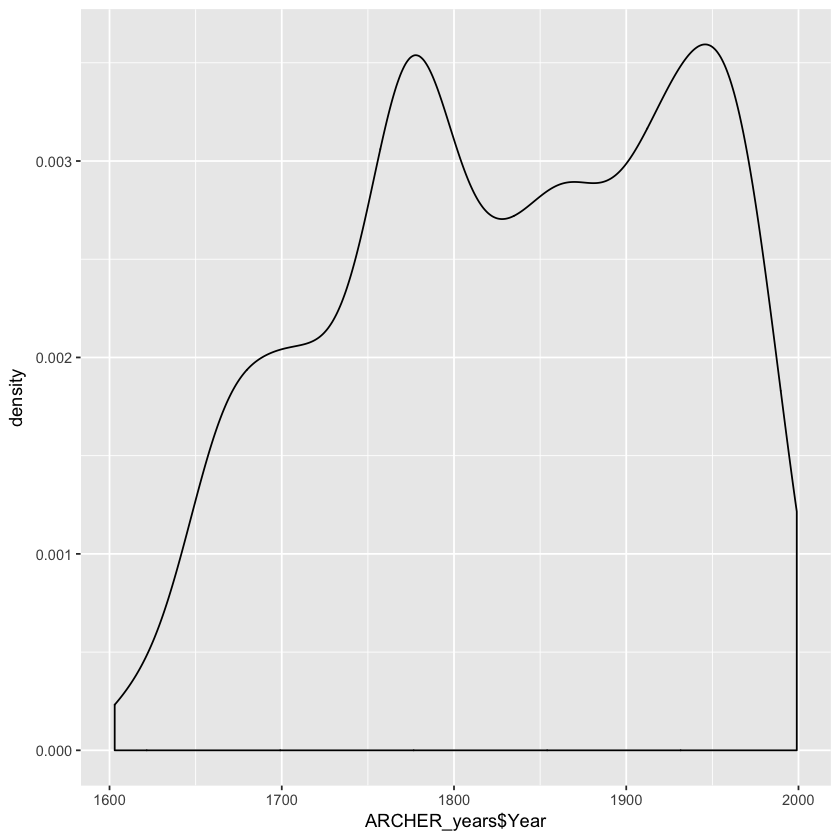

In [13]:
ggplot(ARCHER_years, aes(x=ARCHER_years$Year)) + geom_density(kernel='gaussian')

This graph shows that the distribution over the years in ARCHER has two peaks: One around 1775 and one around 1950. This supports the decision to predict NAs with linear regression over the texts instead of just using the mean value to fill in NAs, because the mean value is in the middle of the two peaks, and strenghtening the mean would only skew the data set.

In [14]:
summary(ARCHER_stats$Period)

1600-1649 1650-1699 1700-1749 1750-1799 1800-1849 1850-1899 1900-1949 1950-1999 
       30       177       173       332       209       254       268       266

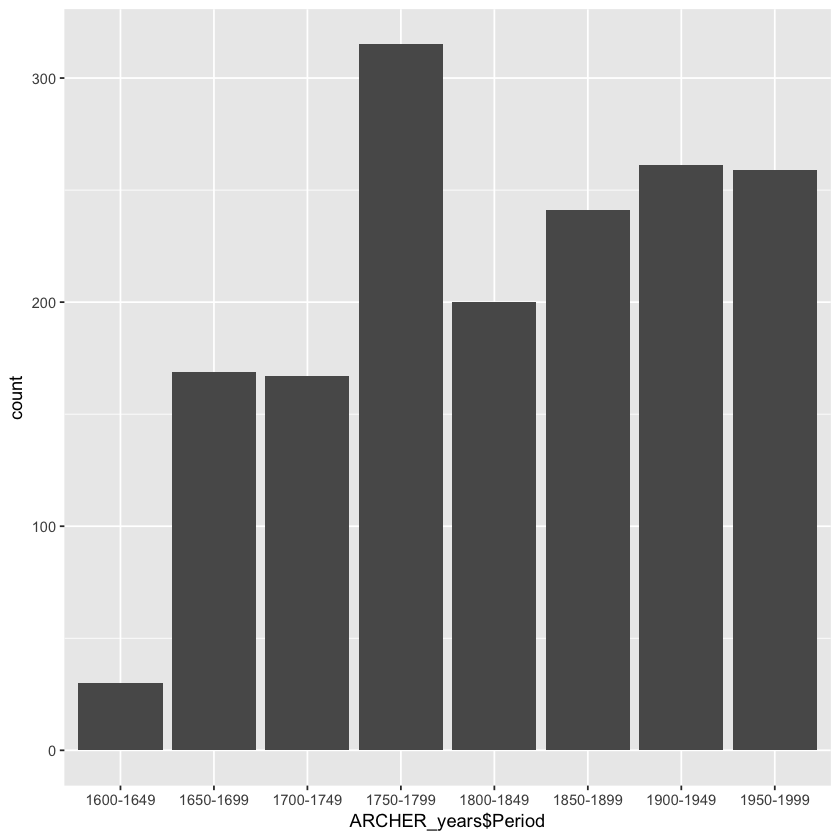

In [15]:
ggplot(ARCHER_years, aes(x=ARCHER_years$Period)) + geom_bar()

This graph shows that binning the corpus into 50-year periods is probably not a good choice for machine learning, since it makes the two peaks seen in the distribution of the years less noticeable. Therefore, it does not reflect the distribution of years over the data set very well. The NAs were filtered out for this graph.

*Binning*

In [16]:
ARCHER_years_bin <- select(ARCHER_years, 'ID', 'Year') %>%
    mutate('upper_bound' = 1999 - trunc((1999-Year)/10) * 10) %>%
    mutate('lower_bound' = upper_bound - 9) %>%
    select(ID, Year, lower_bound, upper_bound) %>%
    mutate('range' = as.factor(paste(as.character(lower_bound), as.character(upper_bound), sep='-')))

head(ARCHER_years_bin)

ID,Year,lower_bound,upper_bound,range
1,1603,1600,1609,1600-1609
2,1605,1600,1609,1600-1609
3,1607,1600,1609,1600-1609
4,1608,1600,1609,1600-1609
5,1608,1600,1609,1600-1609
6,1609,1600,1609,1600-1609


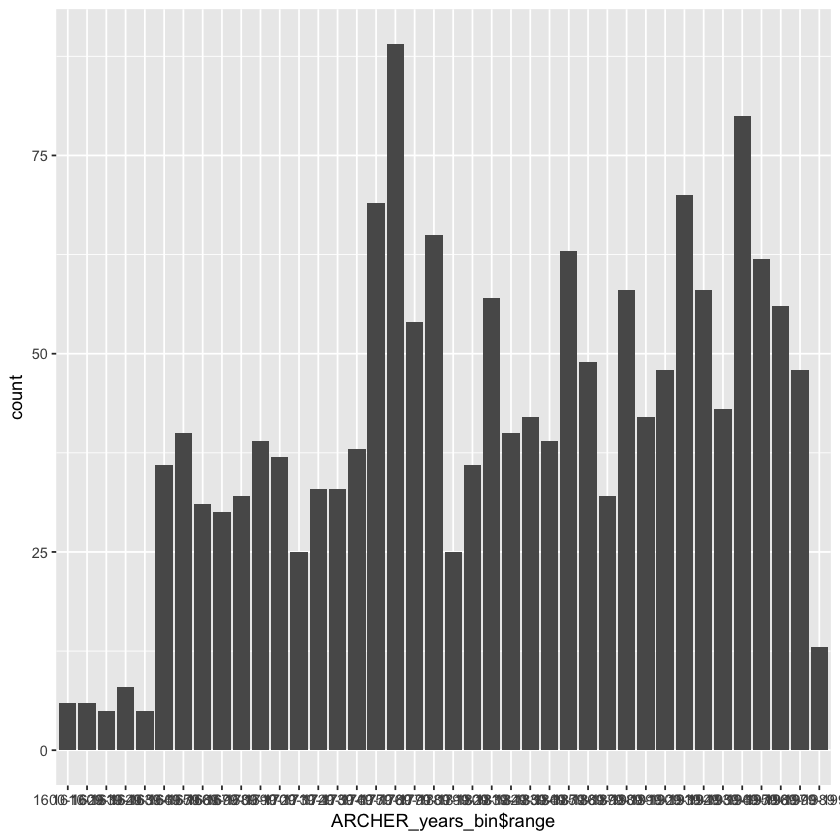

In [17]:
ggplot(ARCHER_years_bin, aes(x=ARCHER_years_bin$range)) + geom_bar()

In [18]:
summary(ARCHER_years_bin)

       ID              Year       lower_bound    upper_bound         range     
 Min.   :   1.0   Min.   :1603   Min.   :1600   Min.   :1609   1770-1779:  89  
 1st Qu.: 425.2   1st Qu.:1762   1st Qu.:1760   1st Qu.:1769   1950-1959:  80  
 Median : 855.5   Median :1836   Median :1830   Median :1839   1920-1929:  70  
 Mean   : 853.2   Mean   :1832   Mean   :1828   Mean   :1837   1760-1769:  69  
 3rd Qu.:1285.8   3rd Qu.:1922   3rd Qu.:1920   3rd Qu.:1929   1790-1799:  65  
 Max.   :1702.0   Max.   :1999   Max.   :1990   Max.   :1999   1860-1869:  63  
                                                               (Other)  :1206  

In [19]:
summary(ARCHER_years_bin$range)

1600-1609 1610-1619 1620-1629 1630-1639 1640-1649 1650-1659 1660-1669 1670-1679 
        6         6         5         8         5        36        40        31 
1680-1689 1690-1699 1700-1709 1710-1719 1720-1729 1730-1739 1740-1749 1750-1759 
       30        32        39        37        25        33        33        38 
1760-1769 1770-1779 1780-1789 1790-1799 1800-1809 1810-1819 1820-1829 1830-1839 
       69        89        54        65        25        36        57        40 
1840-1849 1850-1859 1860-1869 1870-1879 1880-1889 1890-1899 1900-1909 1910-1919 
       42        39        63        49        32        58        42        48 
1920-1929 1930-1939 1940-1949 1950-1959 1960-1969 1970-1979 1980-1989 1990-1999 
       70        58        43        80        62        56        48        13

The more detailed binning shows that 89 texts were written between 1770 and 1779 (first peak), and 80 between 1950 and 1959 (second peak). Interestingly, in the density chart for the distribution, the second peak seemed to be as high or higher than the first one, whereas in all the bar charts, the first peak is clearly higher than the second peak.

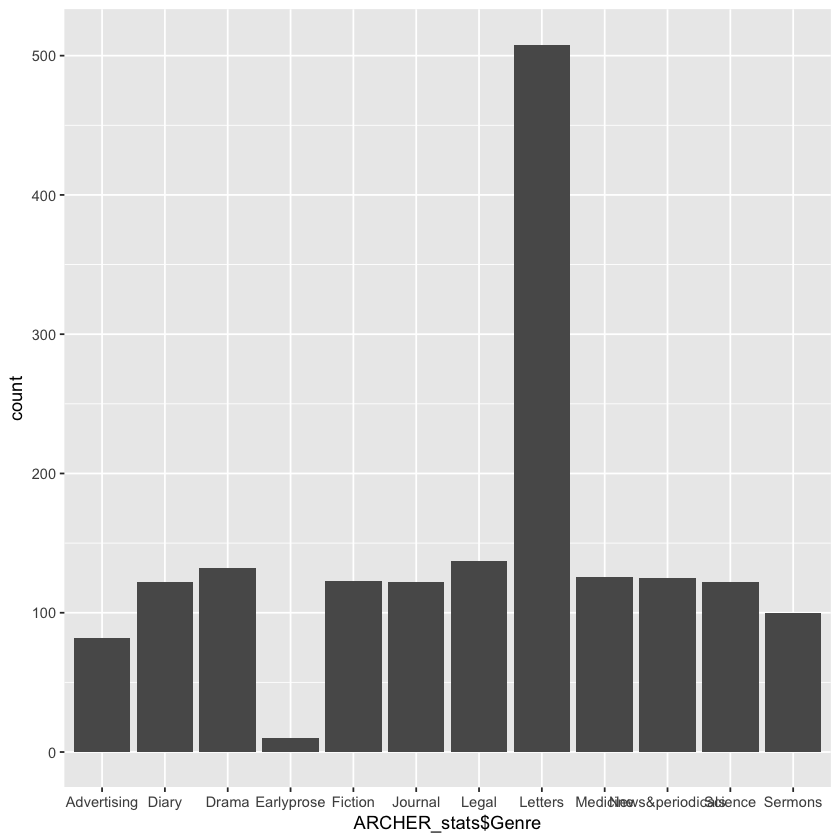

In [20]:
ggplot(ARCHER_stats, aes(x = ARCHER_stats$Genre)) + geom_bar()

This graph shows that most of the texts in ARCHER are letters, and that Early prose is a really small genre.

Warning message:
“Removed 67 rows containing non-finite values (stat_boxplot).”

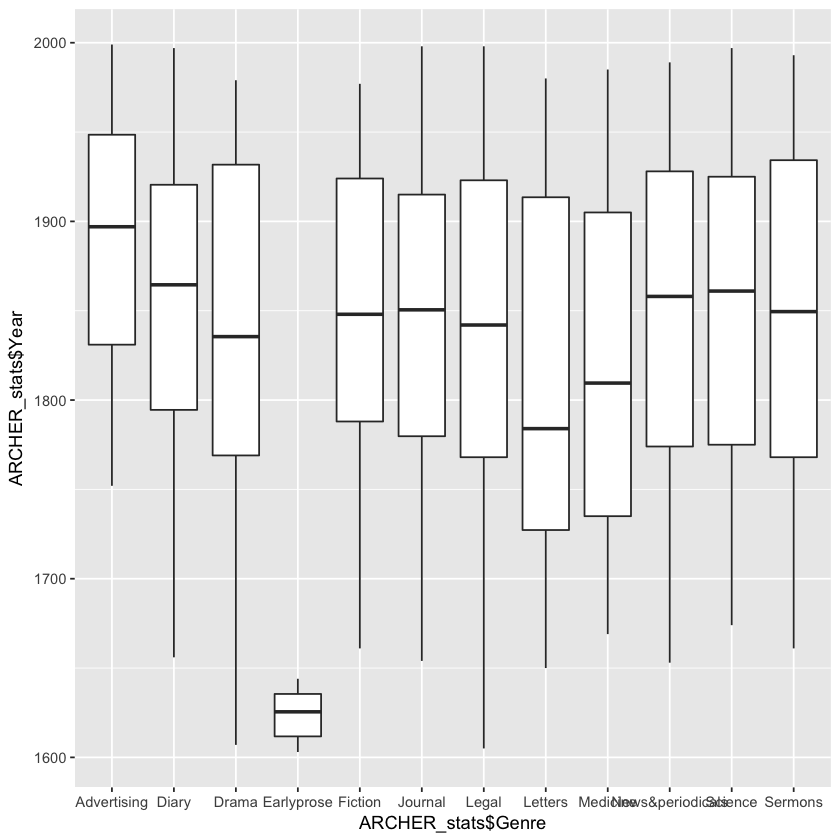

In [21]:
ggplot(ARCHER_stats, aes(x=ARCHER_stats$Genre, y=ARCHER_stats$Year)) + geom_boxplot()

This graph shows that Early Prose is such a small category because it starts about 1600, and ends about 1650. Therefore, Early Prose seems to be a really specialised genre. The other categories (except Legal and Drama) start around 1650 or later (e.g. Advertising starts around 1750), and end shortly before 2000.

Warning message:
“Removed 67 rows containing non-finite values (stat_boxplot).”

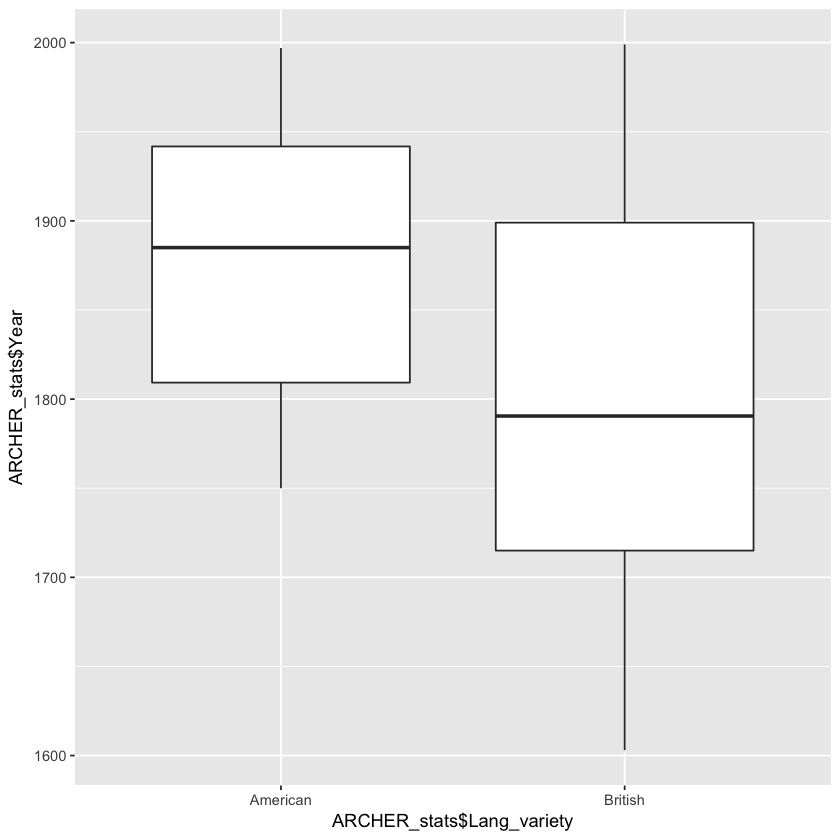

In [22]:
ggplot(ARCHER_stats, aes(x=ARCHER_stats$Lang_variety, y=ARCHER_stats$Year)) + geom_boxplot()

Warning message:
“Removed 67 rows containing non-finite values (stat_boxplot).”

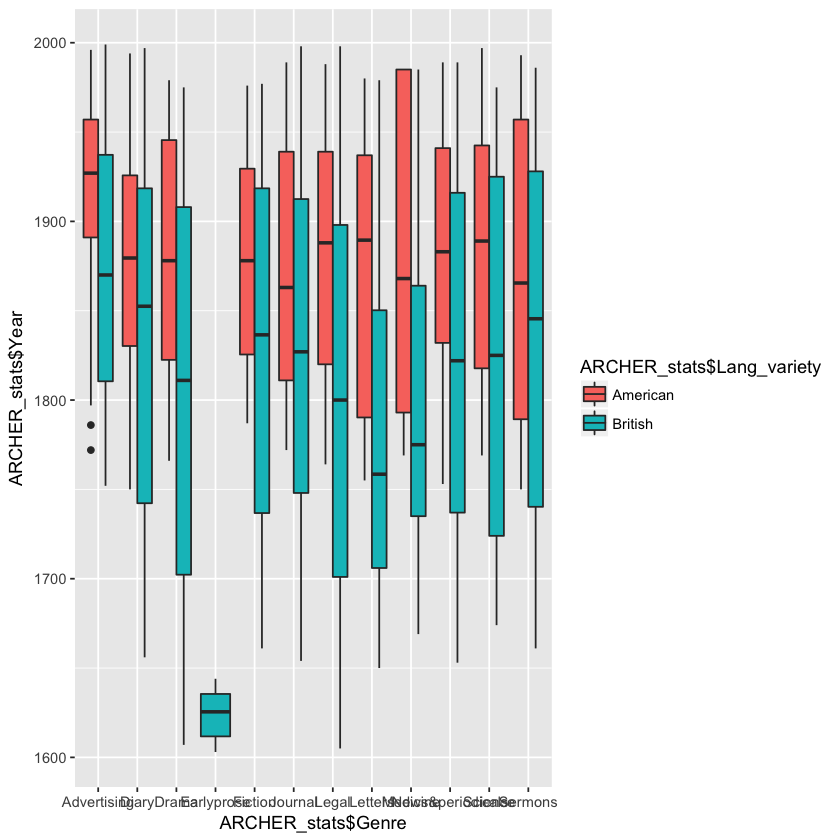

In [23]:
ggplot(ARCHER_stats, aes(x=ARCHER_stats$Genre, y=ARCHER_stats$Year, fill=ARCHER_stats$Lang_variety)) + geom_boxplot()

It is not surprising that the mean age of the texts in American English is higher than the mean of the ones in British English, since the oldest texts in the corpus were written about 100 years after America was found, and it needed some time to build settlements and establish a new culture. Furthermore, American English often refers to the varieties spoken in the USA, and the Declaration of Independence was written in 1776. The graph shows that the oldest texts in American English were written around 1750, which indicates that the label "American English" might also be influenced by the political history of England and USA. Interestingly, the large peak in the distribution of written texts over the year is between 1770 and 1779, the same period the Declaration of Independence was written. It seems that this document had a huge impact on the data in the ARCHER.

The graph also shows that for the period in which American and British texts are available, the corpus seems to be more or less balanced.

In [24]:
en_varieties = select(ARCHER_stats, 'ID','Year','Lang_variety', 'Genre') %>%
    filter(Year >= 1770)
    

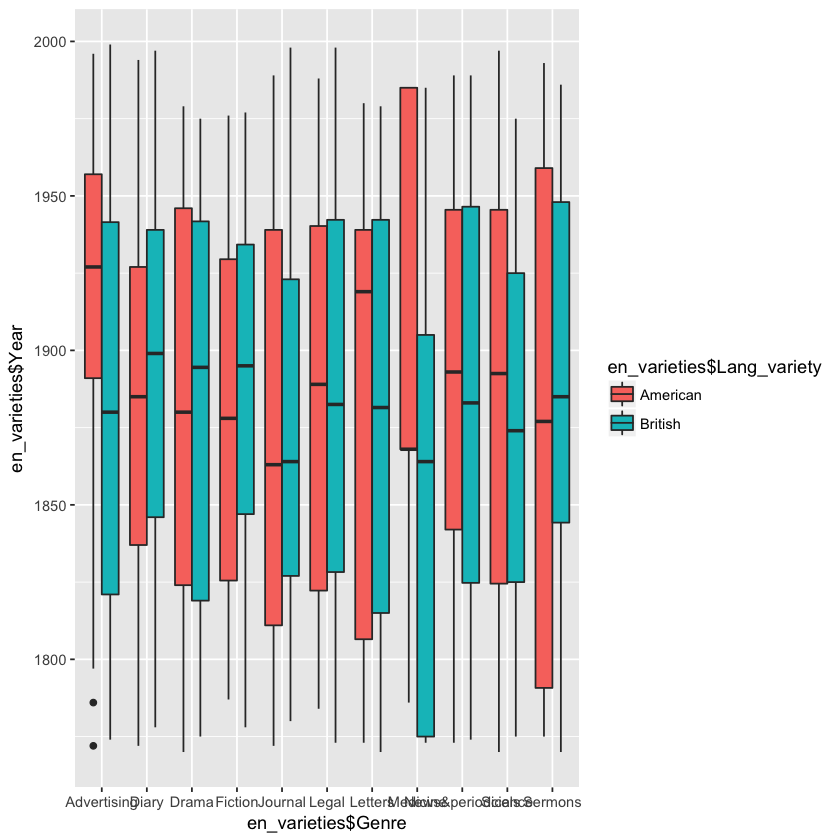

In [25]:
ggplot(en_varieties, aes(x=en_varieties$Genre, y=en_varieties$Year, fill= en_varieties$Lang_variety)) + geom_boxplot()

This graph with instances after 1770 shows that the ARCHER Corpus is not well-balanced between British and American English. The balance heavily depends on the genre.

**GerManC analysis**

In [26]:
summary(GERMANC_meta)

       X           ID           Text                                Filename  
 Min.   :0   Min.   :  1.00   body:336   DRAM_P1_NoD_1673_Leonilda.xml  :  1  
 1st Qu.:0   1st Qu.: 84.75              DRAM_P1_NoD_1699_Euridice.xml  :  1  
 Median :0   Median :168.50              DRAM_P1_NoD_1700_Freyheit.xml  :  1  
 Mean   :0   Mean   :168.50              DRAM_P1_OMD_1657_Cardenio.xml  :  1  
 3rd Qu.:0   3rd Qu.:252.25              DRAM_P1_OMD_1661_Cleopatra.xml :  1  
 Max.   :0   Max.   :336.00              DRAM_P1_OMD_1683_Masaniello.xml:  1  
                                         (Other)                        :330  
                                     Title    
 Ordentliche Wochentliche Post-Zeitungen:  4  
 Mercurii Relation                      :  3  
 Auæfuͤhrliche Relation                  :  2  
 Augspurgische Ordinari Post-Zeitung    :  2  
 Berlinische Nachrichten                :  2  
 Europäische Welt- und Staats-Geschichte:  2  
 (Other)                              

In [27]:
GERMANC_stats = select(GERMANC_meta, 'ID','Title','Author','Genre','Year','Period','Region')
GERMANC_stats$Year = as.numeric(as.character(GERMANC_stats$Year))

summary(GERMANC_stats)

Warning message in eval(expr, envir, enclos):
“NAs durch Umwandlung erzeugt”

       ID                                             Title    
 Min.   :  1.00   Ordentliche Wochentliche Post-Zeitungen:  4  
 1st Qu.: 84.75   Mercurii Relation                      :  3  
 Median :168.50   Auæfuͤhrliche Relation                  :  2  
 Mean   :168.50   Augspurgische Ordinari Post-Zeitung    :  2  
 3rd Qu.:252.25   Berlinische Nachrichten                :  2  
 Max.   :336.00   Europäische Welt- und Staats-Geschichte:  2  
                  (Other)                                :321  
                          Author           Genre         Year     
 unknown                     : 66   Newspaper :66   Min.   :1654  
 Unknown                     : 28   Drama     :45   1st Qu.:1689  
 anon.                       :  4   Legal     :45   Median :1729  
 Friedrich Maximilian Klinger:  3   Sermon    :45   Mean   :1728  
 Jakob Michael Reinhold Lenz :  3   Humanities:44   3rd Qu.:1772  
 Abraham a Sancta Clara      :  2   Narrative :44   Max.   :1799  
 (Other)          

The mean over all years in GerManC is 1728, which is about 100 years lower than the mean of the ARCHER corpus (mean = 1832).

And as in the ARCHER, there are some NA's in the column "Year"

Warning message:
“Removed 63 rows containing non-finite values (stat_density).”

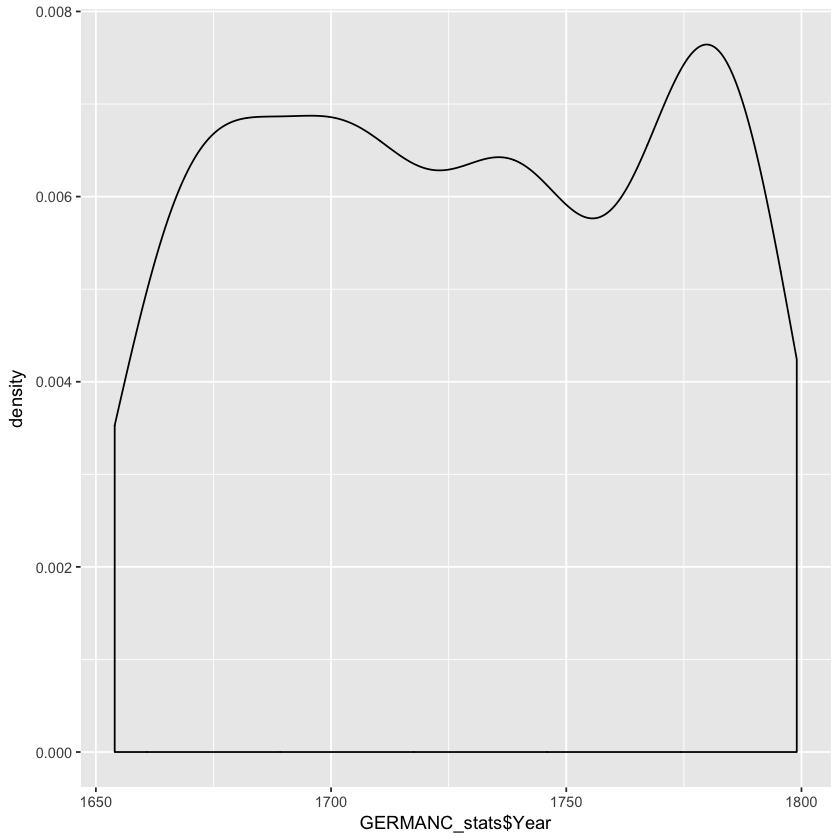

In [28]:
ggplot(GERMANC_stats,aes(x=GERMANC_stats$Year)) + geom_density(kernel='gaussian')

This graph shows that the GerManC is more or less well balanced over all years. The most significant peak is about 1776, the same period in which the ARCHER also has a large peak.

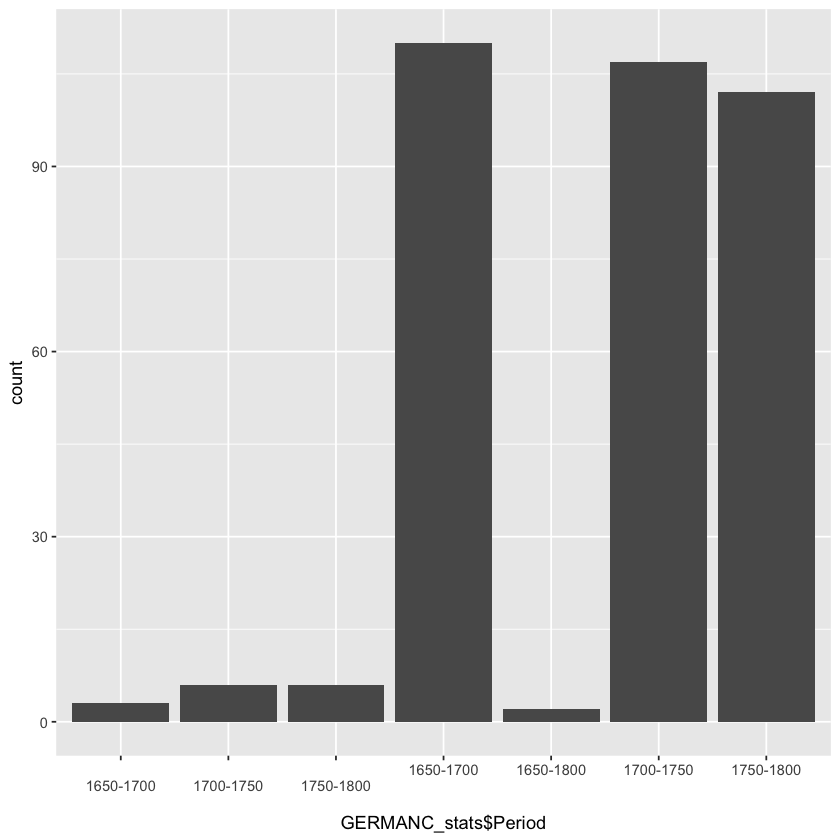

In [29]:
ggplot(GERMANC_stats, aes(x=GERMANC_stats$Period)) + geom_bar()

It looks like they used different encodings for their periods. They seem to have tried to use fifty-year periods. I re-bin them manually into fifty-year periods, although I think that fifty-year periods are not a good representation of the data.

In [30]:
GERMANC_years_bin <- select(GERMANC_stats, 'ID', 'Year') %>%
    mutate('upper_bound' = 1799 - trunc((1799-Year)/50) * 50) %>%
    mutate('lower_bound' = upper_bound - 49) %>%
    select(ID, Year, lower_bound, upper_bound) %>%
    mutate('range' = as.factor(paste(as.character(lower_bound), as.character(upper_bound), sep='-')))

head(GERMANC_years_bin)

ID,Year,lower_bound,upper_bound,range
1,1673,1650,1699,1650-1699
2,1699,1650,1699,1650-1699
3,1700,1700,1749,1700-1749
4,1657,1650,1699,1650-1699
5,1661,1650,1699,1650-1699
6,1683,1650,1699,1650-1699


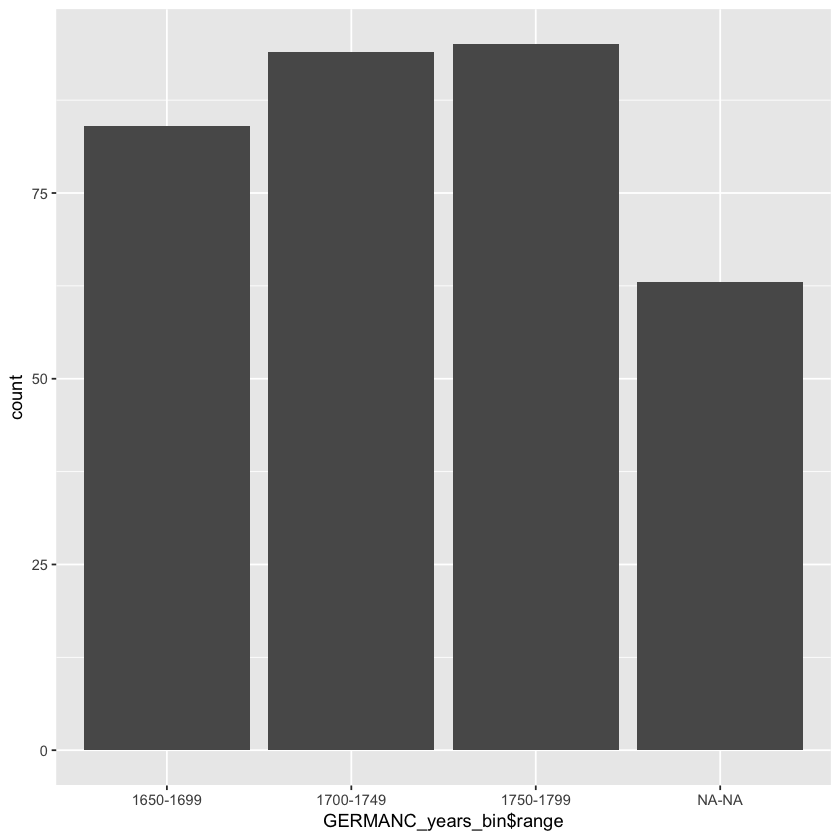

In [31]:
ggplot(GERMANC_years_bin, aes(x=GERMANC_years_bin$range)) + geom_bar()

This graph shows that fifty-year-bins result in a very even distribution over all periods, and that there are a lot of NA's in the year variable of the GerManC.

In [32]:
GERMANC_years_bin <- select(GERMANC_stats, 'ID', 'Year','Genre','Region') %>%
    mutate('upper_bound' = 1799 - trunc((1799-Year)/20) * 20) %>%
    mutate('lower_bound' = upper_bound - 19) %>%
    select(ID, Year, Genre, Region, lower_bound, upper_bound) %>%
    mutate('range' = as.factor(paste(as.character(lower_bound), as.character(upper_bound), sep='-')))

head(GERMANC_years_bin)

ID,Year,Genre,Region,lower_bound,upper_bound,range
1,1673,Drama,North German,1660,1679,1660-1679
2,1699,Drama,North German,1680,1699,1680-1699
3,1700,Drama,North German,1700,1719,1700-1719
4,1657,Drama,East Central German,1640,1659,1640-1659
5,1661,Drama,East Central German,1660,1679,1660-1679
6,1683,Drama,East Central German,1680,1699,1680-1699


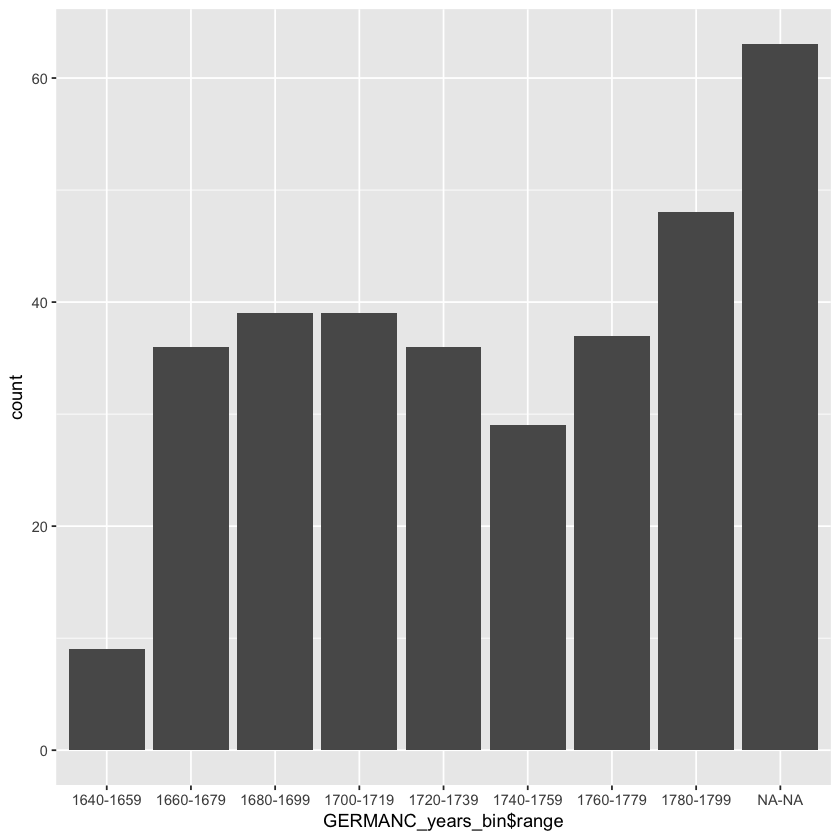

In [33]:
ggplot(GERMANC_years_bin, aes(x=GERMANC_years_bin$range)) + geom_bar()

Independent from the binning, the NA's will be a major factor for cleaning and building stratas. The values can be estimated using linear regression (as with the ARCHER). Experiments show that 10-year or 20-year bins provide a reasonable amount of details whitout being too fine-grained.

Warning message:
“Removed 63 rows containing non-finite values (stat_boxplot).”

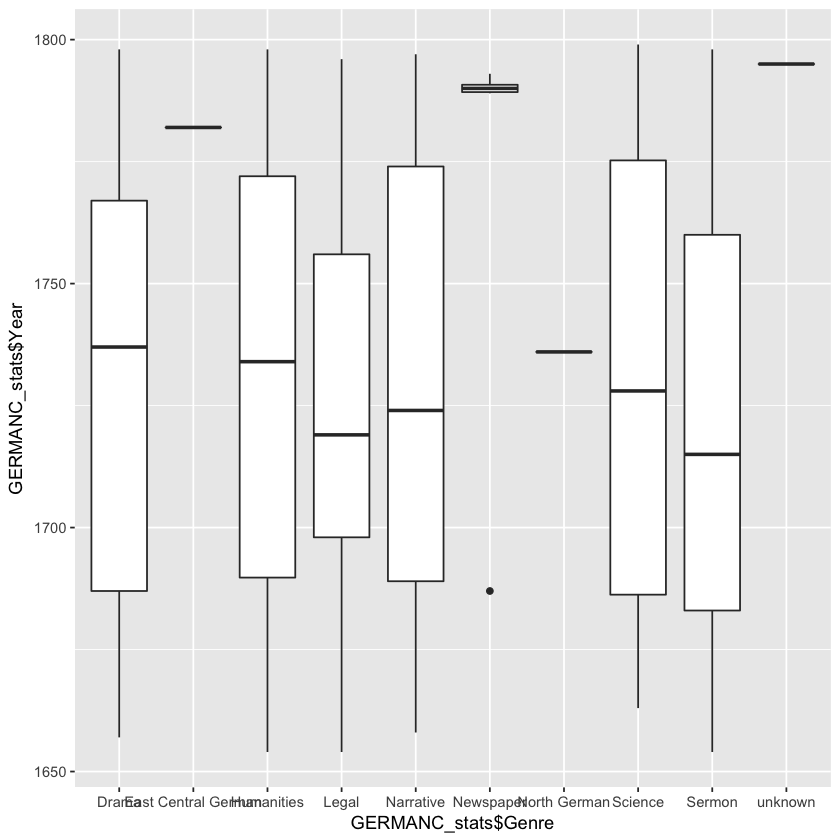

In [34]:
ggplot(GERMANC_stats, aes(x=GERMANC_stats$Genre, y=GERMANC_stats$Year)) + geom_boxplot()

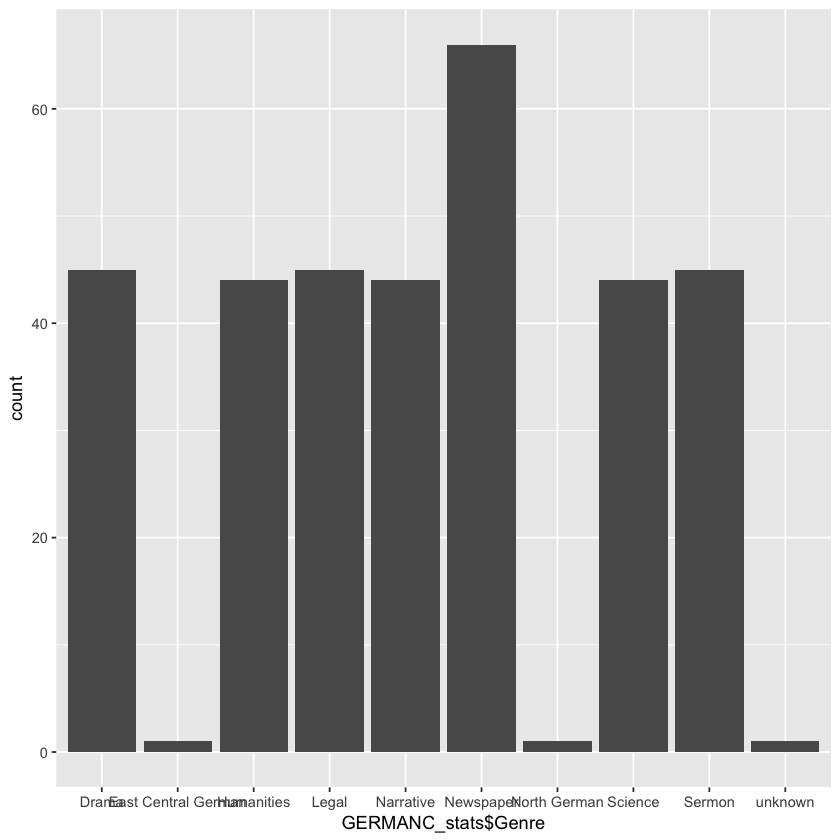

In [35]:
ggplot(GERMANC_stats, aes(x=GERMANC_stats$Genre)) + geom_bar()

It seems that three documents were not assigned to the correct genre. Two of them have the language variety / region as genre, and one is not classified at all. 

They also show that the corpus is not balanced well in terms of time and genre, since "Newspaper" is the largest genre, but nearly all texts in this genre were written shortly after 1775. ARCHER, for example, has a similar category (news and periodicals), which is more distributed over time than the similar variable in the GerManC. 

The categories Drama, Humanities, Legal, Narrative, Science and Sermon are well balanced, and also distributed more even over time.

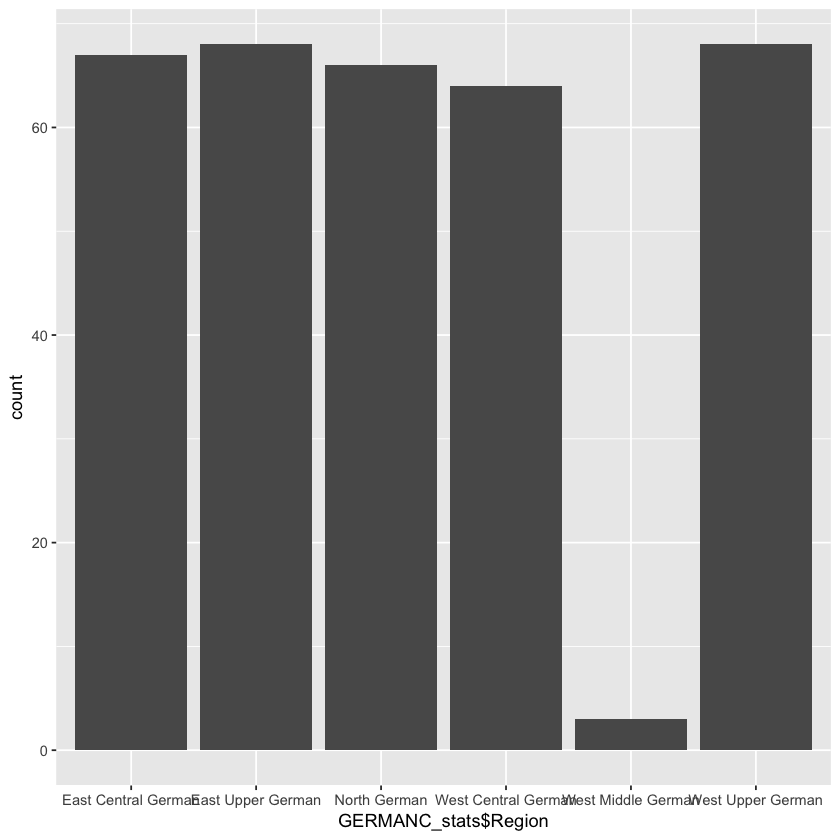

In [36]:
ggplot(GERMANC_stats, aes(x=GERMANC_stats$Region)) + geom_bar()

Warning message:
“Removed 63 rows containing non-finite values (stat_boxplot).”

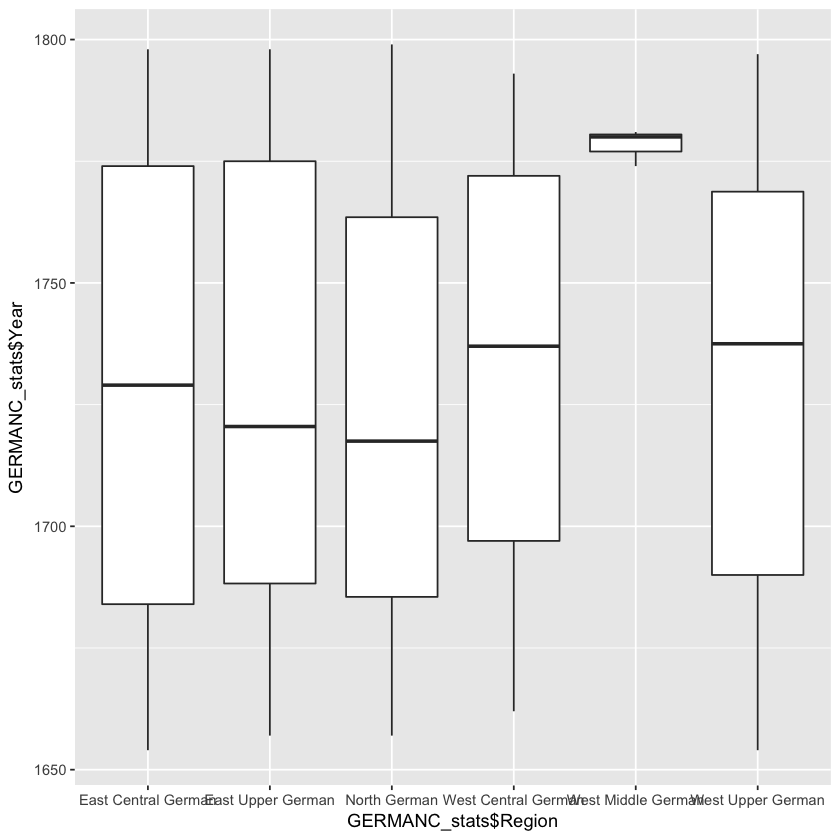

In [37]:
ggplot(GERMANC_stats, aes(x=GERMANC_stats$Region, y=GERMANC_stats$Year)) + geom_boxplot() 

The distribution over regions with respect to time is balanced, except for West Middle German which is a minor category, and also a very young one. Given the fact that there is also a category named "West Central German", it seems like one annotator mislabeled several younger texts as "West Middle German" that should belong to "West Central German". Due to the year the texts were written, it is highly unlikely that the annotator used "Middle German" in the meaning of the historical period, because Middle German was spoken from about 1050-1350, and the documents in the questionable category were written shortly after 1775, which is absolutely not in the Middle-German-period.

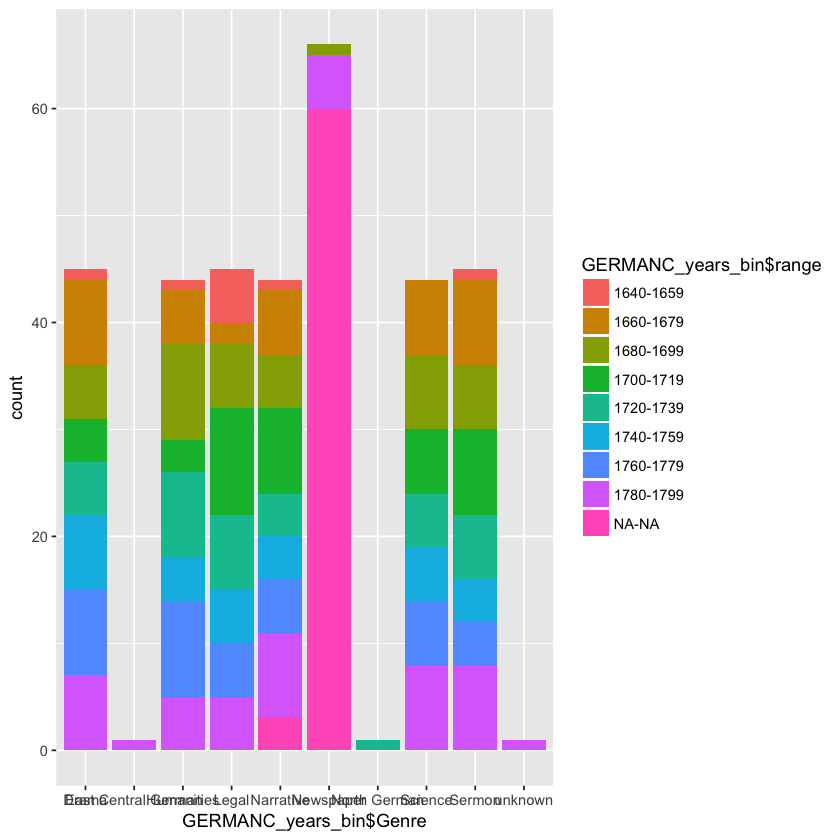

In [38]:
ggplot(GERMANC_years_bin, aes(x=GERMANC_years_bin$Genre, fill= GERMANC_years_bin$range)) + geom_bar()

Here we can see that most instances with unknown year belong to the category 'News'. Which is surpristing, because news usually have a clear date, at least nowadays. It also shows that a boxplot does only map a fraction of 'News', because boxplot does drop all NA's

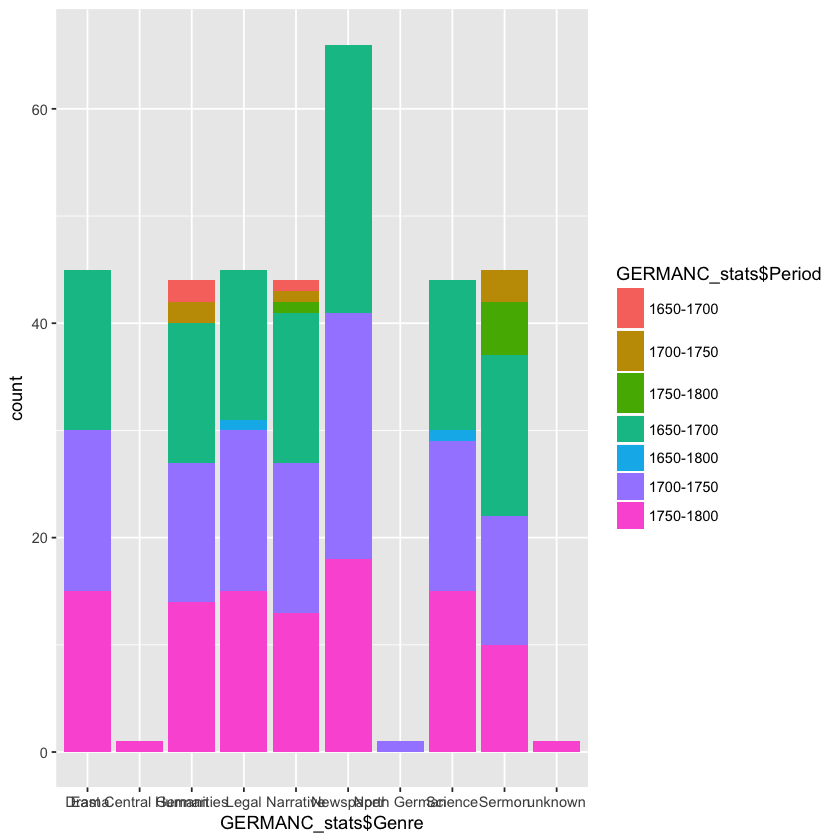

In [39]:
ggplot(GERMANC_stats, aes(x=GERMANC_stats$Genre, fill= GERMANC_stats$Period)) + geom_bar()

All news do have a value in the variable 'Period'. The graph shows that the texts are distributed evenly over 150 years (with bins of 50 years), but it seems that news before 1750 were not assigned a year, hence all the NA's. Also, the labeling of the period for 'News' is consistent in itself, so the numbers in 'period' can be used to fill in NA's. The other NA's are in the category 'Narrative', which has certain texts labeled as somewhere in the range between 1650-1700. Since only a few texts are labeled like this, it might be the best strategy to just drop those columns.

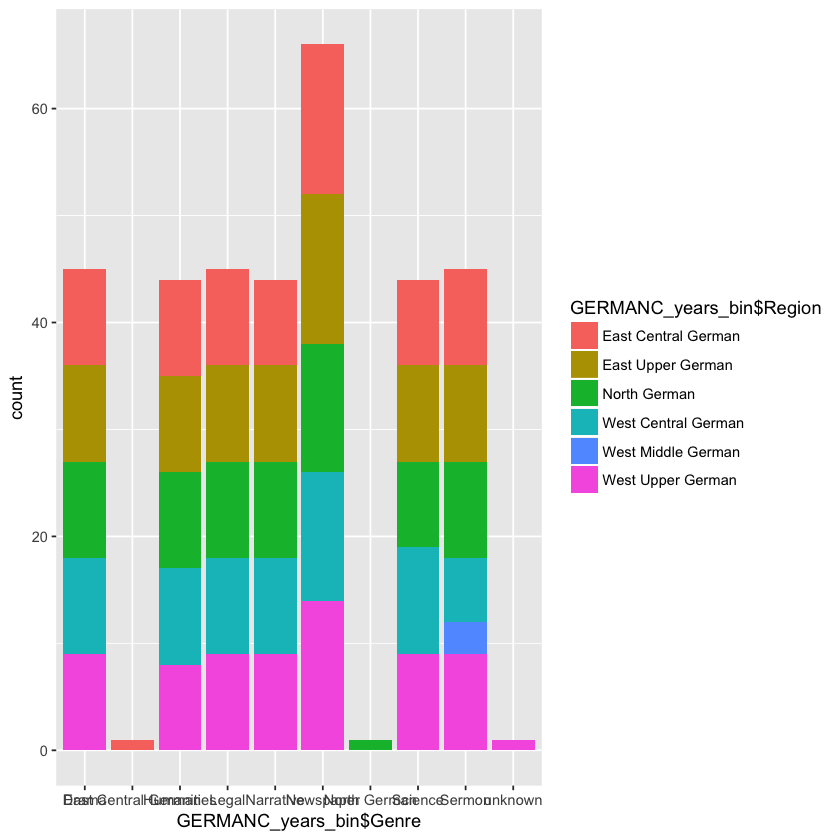

In [40]:
ggplot(GERMANC_years_bin, aes(x=GERMANC_years_bin$Genre, fill= GERMANC_years_bin$Region)) + geom_bar()

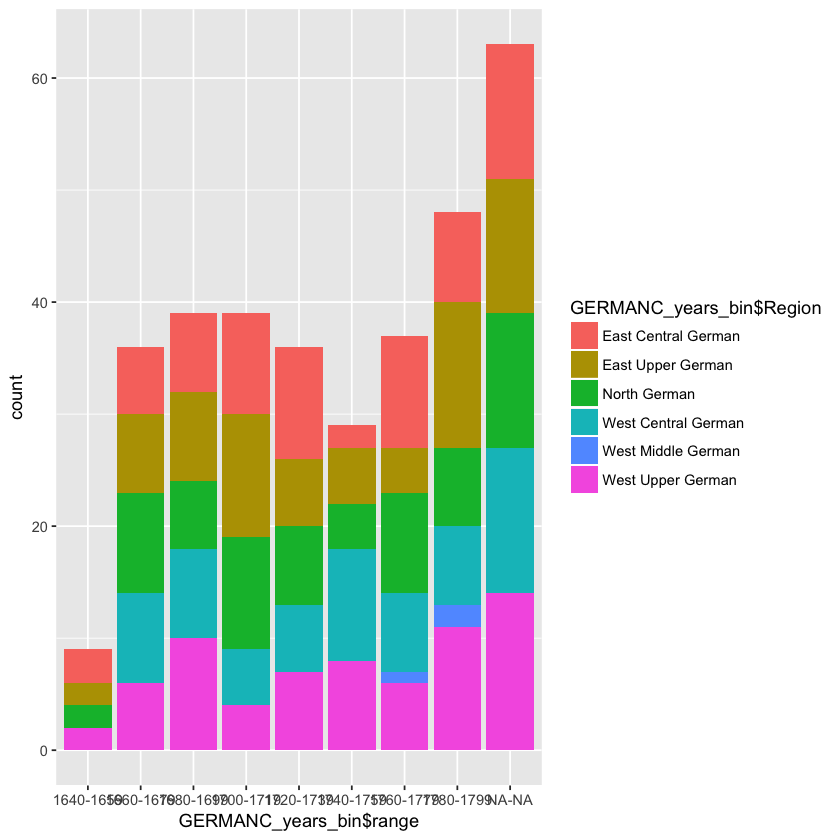

In [41]:
ggplot(GERMANC_years_bin, aes(x=GERMANC_years_bin$range, fill= GERMANC_years_bin$Region)) + geom_bar()

According to this two graphs, the text labeled as 'West Middle German' can be assigned with 'West Central German', since they only occur in one category, in a very narrow time frame, and the label seems to be wrong.

I will drop the three texts without a valid category, since this problem occurs only in three texts, and assigning a genre to them needs to be done manually.

**CLMET**

In [42]:
summary(CLMET_meta)

       X           ID        Text                    File        File_ID   
 Min.   :0   Min.   :  1   text:333   CLMET3_1_1_1.txt :  1   Min.   :  1  
 1st Qu.:0   1st Qu.: 84              CLMET3_1_1_10.txt:  1   1st Qu.: 84  
 Median :0   Median :167              CLMET3_1_1_11.txt:  1   Median :167  
 Mean   :0   Mean   :167              CLMET3_1_1_12.txt:  1   Mean   :167  
 3rd Qu.:0   3rd Qu.:250              CLMET3_1_1_13.txt:  1   3rd Qu.:250  
 Max.   :0   Max.   :333              CLMET3_1_1_14.txt:  1   Max.   :333  
                                      (Other)          :327                
       Period        Quartcent      Decade         Year    
 1710-1780: 88   1875-1899:61   1890s  : 34   1751   :  6  
 1780-1850: 99   1900-1924:55   1910s  : 27   1892   :  6  
 1850-1920:146   1825-1849:43   1770s  : 25   1839   :  5  
                 1775-1799:41   1900s  : 24   1889   :  5  
                 1750-1774:36   1840s  : 22   1894   :  5  
                 1800-1824:27   

In [43]:
CLMET_stats = select(CLMET_meta, 'ID','Title','Author','Genre','Year','Decade','Period')
CLMET_stats$Year = as.numeric(as.character(CLMET_stats$Year))

summary(CLMET_stats)

Warning message in eval(expr, envir, enclos):
“NAs durch Umwandlung erzeugt”

       ID                                                   Title    
 Min.   :  1   Letters                                         :  2  
 1st Qu.: 84   A Christmas Carol in Prose                      :  1  
 Median :167   A Christmas tale                                :  1  
 Mean   :167   A defence of free-thinking in mathematics       :  1  
 3rd Qu.:250   A narrative of the life of Mrs. Charlotte Charke:  1  
 Max.   :333   A Pair of Blue Eyes                             :  1  
               (Other)                                         :326  
                           Author                      Genre          Year     
 Austen, Jane                 :  3   Drama                : 74   Min.   :1710  
 Bagehot, Walter              :  3   LET                  : 13   1st Qu.:1782  
 Barrie, James Matthew        :  3   Narrative fiction    :127   Median :1845  
 Bulwer-Lytton, Edward George :  3   Narrative non-fiction: 27   Mean   :1839  
 Burke, Edmund                :  3   Oth

Warning message:
“Removed 40 rows containing non-finite values (stat_density).”

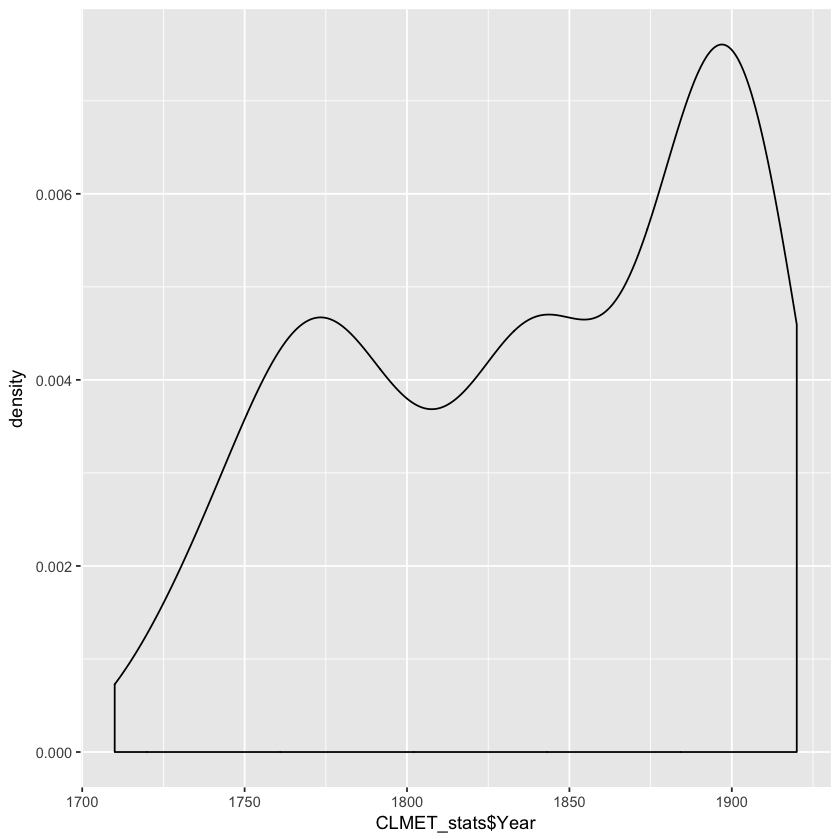

In [44]:
ggplot(CLMET_stats, aes(x=CLMET_stats$Year)) + geom_density(kernel='gaussian')

The density graph of the CLMET shows two peaks at about the same time as the ARCHER does, although in CLMET, the second peak is much larger and steeper than the corresponding peak in ARCHER. The mean age of the CLMET is about the same age as the mean of the ARCHER.

In [63]:
ARCHER_texts <- select(ARCHER_stats, 'Author','Title','Year')
CLMET_texts <- select(CLMET_stats, 'Author','Title','Year')

summary(ARCHER_texts)
head(ARCHER_stats, 1)

                Author    
 Anonymous         : 359  
 Johnson, Samuel   :  22  
 Steele, Richard   :  11  
 Defoe, Daniel     :  10  
 Franklin, Benjamin:  10  
 Pope, Alexander   :   9  
 (Other)           :1288  
                                                               Title     
 Edinburgh Medical Journal, vol. 9.                               :  10  
 Medical Essays and Observations, Vol. III, 3rd ed.               :   9  
 Edinburgh Medical and Surgical Journal, vol. 16.                 :   8  
 Medical and Philosophical Commentaries, Vol. III.                :   5  
 In Grenville Kleiser (ed.), The World's Great Sermons. vol. VIII.:   4  
 In Grenville Kleiser (ed.), The World's Great Sermons. vol. X.   :   3  
 (Other)                                                          :1670  
      Year     
 Min.   :1603  
 1st Qu.:1762  
 Median :1836  
 Mean   :1832  
 3rd Qu.:1922  
 Max.   :1999  
 NA's   :67    

ID,Title,Author,Sex,Year,Period,Lang_variety,Genre
1,The Wonderfull yeare. London.,"Dekker, Thomas",male,1603,1600-1649,British,Earlyprose


In [46]:
summary(CLMET_texts)
head(CLMET_stats, 1)

                           Author   
 Austen, Jane                 :  3  
 Bagehot, Walter              :  3  
 Barrie, James Matthew        :  3  
 Bulwer-Lytton, Edward George :  3  
 Burke, Edmund                :  3  
 Butler, Samuel               :  3  
 (Other)                      :315  
                                              Title          Year     
 Letters                                         :  2   Min.   :1710  
 A Christmas Carol in Prose                      :  1   1st Qu.:1782  
 A Christmas tale                                :  1   Median :1845  
 A defence of free-thinking in mathematics       :  1   Mean   :1839  
 A narrative of the life of Mrs. Charlotte Charke:  1   3rd Qu.:1894  
 A Pair of Blue Eyes                             :  1   Max.   :1920  
 (Other)                                         :326   NA's   :40    
                   Genre    
 Drama                : 74  
 LET                  : 13  
 Narrative fiction    :127  
 Narrative non-ficti

ID,Title,Author,Genre,Year,Decade,Period
1,A treatise concerning the principles of human knowlege,"Berkeley, George",Treatise,1710,1710s,1710-1780


The summary of both corpora show that they are built similarily, and at least partially contain the same texts. The key difference seems to be that ARCHER offers more attributes, whereas CLMET is at least partially annotated. To test how many instances are the same, I use the intersect()-method, which returns all the instances that occur in both data frames.

In [64]:
CLMET_ARCHER_intersect <- intersect(CLMET_texts, ARCHER_texts)

summary(CLMET_ARCHER_intersect)

Warning message:
“Column `Author` joining factors with different levels, coercing to character vector”Warning message:
“Column `Title` joining factors with different levels, coercing to character vector”

    Author             Title                Year    
 Length:0           Length:0           Min.   : NA  
 Class :character   Class :character   1st Qu.: NA  
 Mode  :character   Mode  :character   Median : NA  
                                       Mean   :NaN  
                                       3rd Qu.: NA  
                                       Max.   : NA  

This operation shows that CLMET and ARCHER have no texts in common.

Warning message:
“Removed 40 rows containing non-finite values (stat_boxplot).”

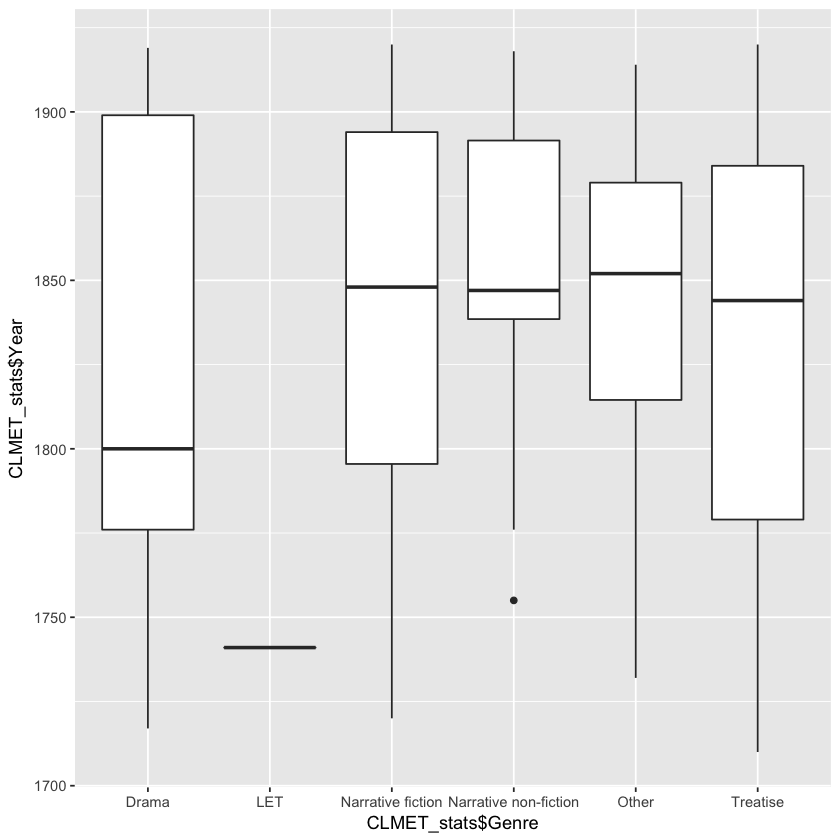

In [66]:
ggplot(CLMET_stats, aes(x=CLMET_stats$Genre, y=CLMET_stats$Year)) + geom_boxplot()

The CLMET has less and other genres than the ARCHER. Except for the genre LET, the genres seem to be balanced out in the time after 1800 (approximately).

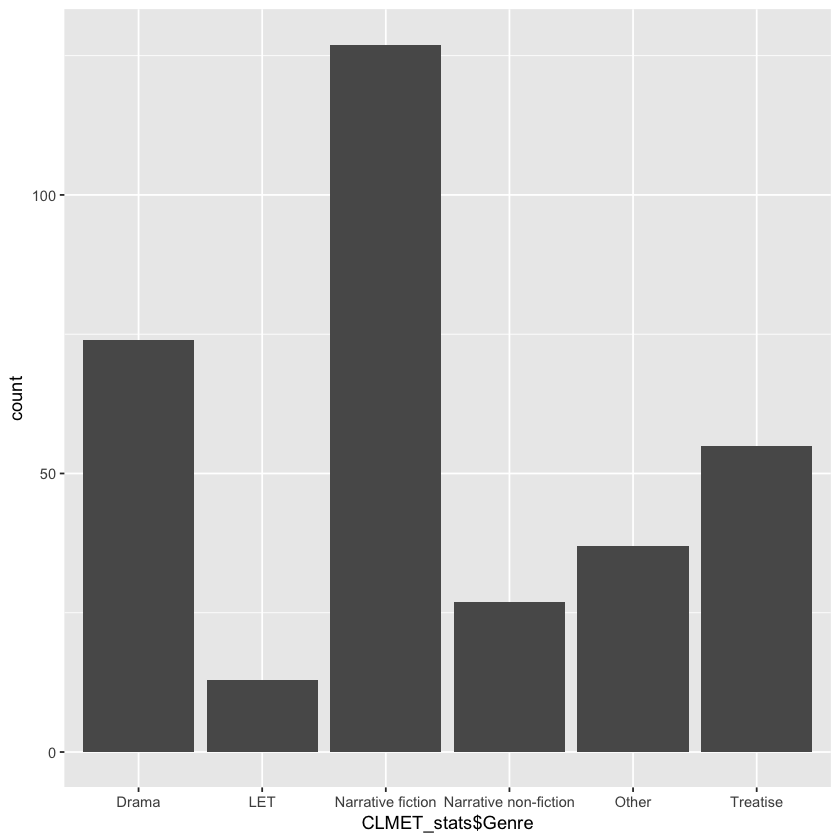

In [67]:
ggplot(CLMET_stats, aes(x=CLMET_stats$Genre)) + geom_bar()

This graph shows that CLMET has a heavy focus on narrative fiction, followed by drama.

**DTA**

In [3]:
DTA_stats <- select(DTA_meta,'Sent_ID','Author','Title','Publication_year','Genre','Subgenre')

DTA_stats$Publication_year <- as.numeric(as.character(DTA_stats$Publication_year))

summary(DTA_stats)

    Sent_ID                                Author    
 Min.   :   1   N. N.                         :  28  
 1st Qu.: 352   Goethe, Johann Wolfgang von   :  21  
 Median : 703   Herder, Johann Gottfried von  :  21  
 Mean   : 703   Bodmer, Johann Jacob          :  12  
 3rd Qu.:1054   Vischer, Friedrich Theodor von:  11  
 Max.   :1405   Schiller, Friedrich           :  10  
                (Other)                       :1302  
                                                                                                                                                                                                                                                                                   Title     
  Gedichte                                                                                                                                                                                                                                                                            :  1

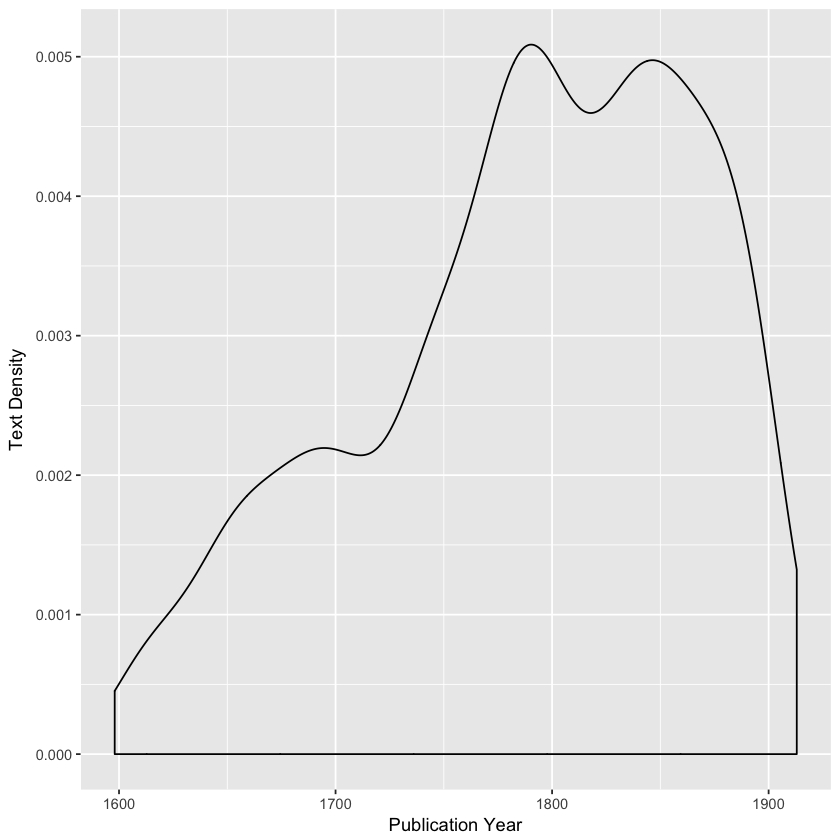

In [10]:
ggplot(DTA_stats, aes(x=DTA_stats$Publication_year)) + geom_density(kernel='gaussian') + xlab('Publication Year') + ylab('Text Density') 


In [11]:
#ggsave('DTA_density.png') #saves the last graph plotted as .png file

Saving 7 x 7 in image


The texts in the DTA corpus have a lower mean age than the texts in the GerManC Corpus. There are also no NA's in the DTA. There is a peak shortly before 1800, and a smaller peak around 1850. The GerManC only contains texts that were written before 1800, so the second peak of the DTA Corpus cannot be seen in the GerManc corpus. The first peak shortly before 1800 is consistent with a peak in the GerManC, although the peak in the GerManc is slightly before the peak in the DTA. This can be due to the higher mean age and the smaller range of the GerManC, so the finding is still very consistent.

A big difference between the two corpora is that in GerManC, the curve before the peak was very flat, while in DTA, there is a steep raise towards the peak. This indicates that both corpora contain different texts.

In [50]:
DTA_texts <- select(DTA_stats, 'Author','Title','Publication_year')

names(DTA_texts)[names(DTA_texts) == 'Publication_year'] = 'Year'

DTA_texts$Author = as.character(DTA_texts$Author)
DTA_texts$Title = as.character(DTA_texts$Title)
summary(DTA_texts)
head(DTA_texts)

    Author             Title                Year     
 Length:1405        Length:1405        Min.   :1598  
 Class :character   Class :character   1st Qu.:1742  
 Mode  :character   Mode  :character   Median :1796  
                                       Mean   :1789  
                                       3rd Qu.:1852  
                                       Max.   :1913  

Author,Title,Year
"Abel, Heinrich Caspar",Wohlerfahrner Leib-Medicus Der Studenten welcher So wohl allen auf Schulen Gymnasiis und Universitäten Lebenden oder auf Reisen begriffenen gelehrten Personen/ als auch allen Menschen insgemein die nöthigsten Reguln und herrlichsten Artzeneyen mittheilet/ Krafft deren sie nicht allein die Gesundheit nechst Gott erhalten/ sondern auch die zugestossenen Kranckheiten abwenden und vertreiben können,1699
"Abschatz, Hans Assmann von",Poetische Ubersetzungen und Gedichte,1704
"Achenwall, Gottfried",Abriß der neuesten Staatswissenschaft der vornehmsten Europäischen Reiche und Republicken zum Gebrauch in seinen Academischen Vorlesungen,1749
"Albertinus, Aegidius",Der Landtstörtzer: Gusman von Alfarche oder Picaro genannt/ dessen wunderbarliches/ abenthewrlichs vnd possirlichs Leben/ was gestallt er schier alle ort der Welt durchloffen/ allerhand Ständt/ Dienst vnd Aembter versucht/ vil guts vnd böses begangen vnd außgestanden/ jetzt reich/ bald arm/ vnd widerumb reich vnd gar elendig worden/ doch letztlichen sich bekehrt hat/ hierin beschriben wirdt,1615
"Alexis, Willibald, Häring, Georg Wilhelm Heinrich",Ruhe ist die erste Bürgerpflicht oder Vor fünfzig Jahren Vaterländischer Roman Erster Band,1852
"Alexis, Willibald, Häring, Georg Wilhelm Heinrich",Ruhe ist die erste Bürgerpflicht oder Vor fünfzig Jahren Vaterländischer Roman Zweiter Band,1852


In [51]:
GERMANC_texts = select(GERMANC_stats, 'Author','Title','Year')

GERMANC_texts$Author = as.character(GERMANC_texts$Author)
GERMANC_texts$Title = as.character(GERMANC_texts$Title)

summary(GERMANC_texts)
head(GERMANC_texts)

    Author             Title                Year     
 Length:336         Length:336         Min.   :1654  
 Class :character   Class :character   1st Qu.:1689  
 Mode  :character   Mode  :character   Median :1729  
                                       Mean   :1728  
                                       3rd Qu.:1772  
                                       Max.   :1799  
                                       NA's   :63    

Author,Title,Year
J. Palm,Newes Historisch-Politisches Schau-Spiel/ Genandt Die Teutsche Großkoͤnigin LEONILDA,1673
Friedrich Christian Bressand,Die sterbende EURIDICE: Singe-Spiel/ auf dem Braunschweigischen Schau-Platz vorgestellet [...],1699
Ortensio Mauro,"Der in seiner Freyheit vergnuͤgte ALCIBIADES, In einem Sing-Spiel vorgestellet Auf dem Braunschweigischen Schau-Platz [...]",1700
Andreas Gryphius,"Cardenio vnd Celinde, Oder Ungluͤcklich Verlibete",1657
Daniel Casper von Lohenstein,Cleopatra,1661
Christian Weise,"Trauer-Spiel Von dem Neapolitanischen Haupt-Rebellen MASANIELLO, [...]",1683


In [52]:
GERMANC_DTA_intersect = intersect(GERMANC_texts, DTA_texts)

summary(GERMANC_DTA_intersect)

    Author             Title                Year    
 Length:0           Length:0           Min.   : NA  
 Class :character   Class :character   1st Qu.: NA  
 Mode  :character   Mode  :character   Median : NA  
                                       Mean   :NaN  
                                       3rd Qu.: NA  
                                       Max.   : NA  

The intersect-method shows that DTA and GerManC do not have any texts in common. It is unsure if there are any encoding problems, since the cell above raised a warning until I converted title and author into characters for both corpora.

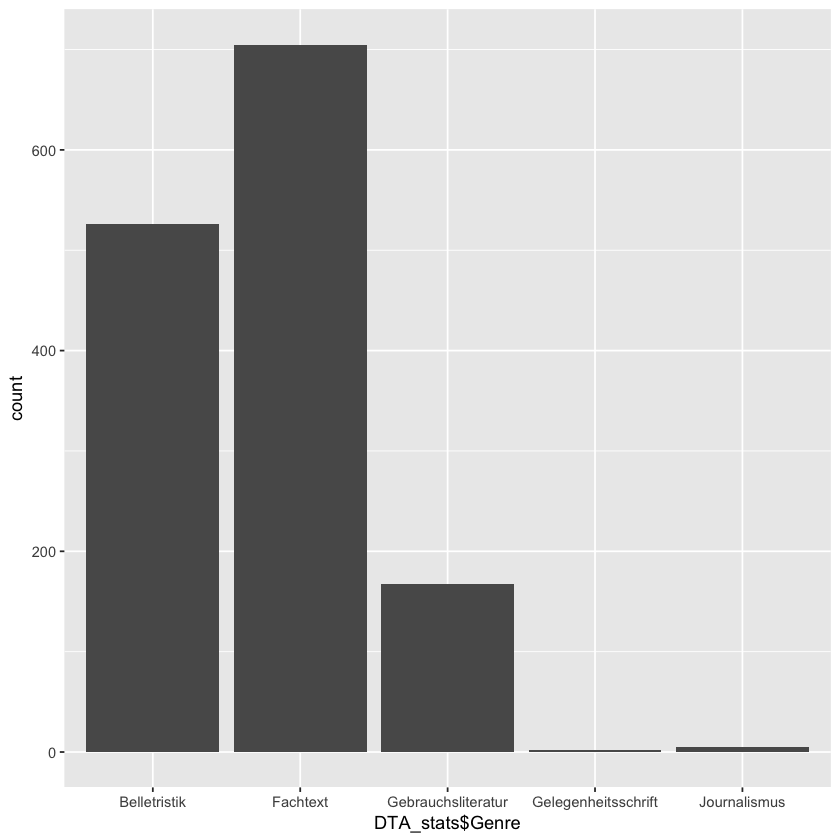

In [53]:
ggplot(DTA_stats, aes(x=DTA_stats$Genre)) + geom_bar()

This plot shows that the DTA consists mainly of Narratives and Scientific texts.

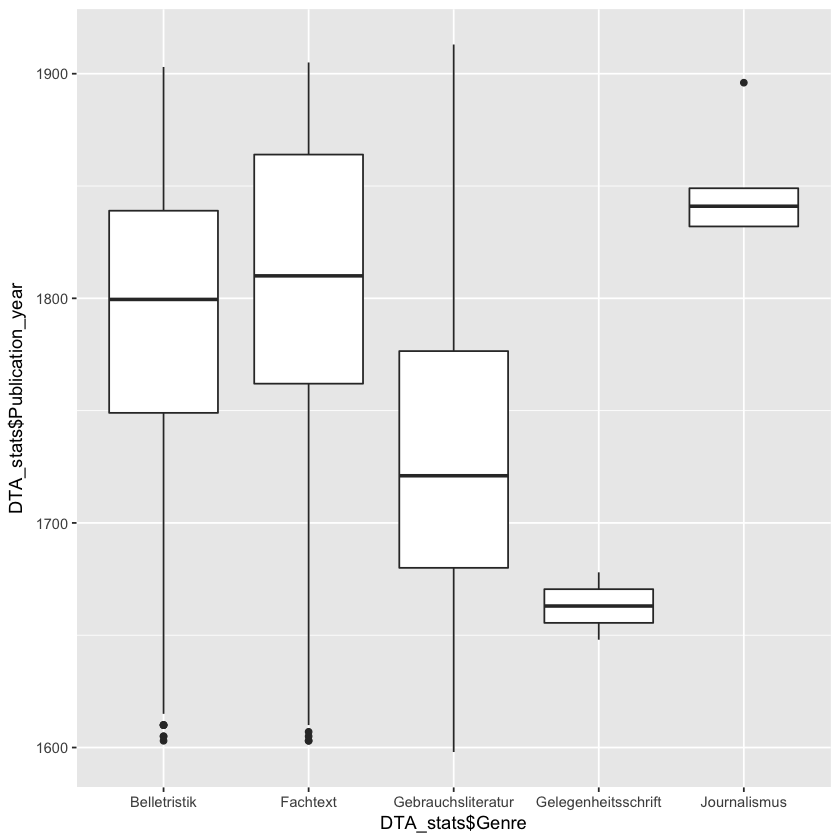

In [54]:
ggplot(DTA_stats, aes(x=DTA_stats$Genre, y=DTA_stats$Publication_year)) + geom_boxplot()

The two largest categories are very balanced out towards each other. The third largest category has a lower mean age than the other two, and the two small categories "Gelegenheitsschrift" and "Journalism" only cover a small fraction of the whole time range. Since these two genres are very small and narrow, it might be useful to filter them out during preprocessing. It would be an interesting experiment to look if a model bases it prediction of the age on the genre or not.

In [55]:
#summary(DTA_stats$Subgenre) #commented out because it result in a really long list

The subgenres in the DTA corpus are very fine grained, and some categories only contain only one or two texts. Since other corpora that also provide a genre are similarly detailed as the main genre of the DTA, the subgenre is far too detailed to use for analysis.

**CEEMT: LMEMT and MEMT**

In [56]:
CEEMT_stats = bind_rows(EMEMT_meta,LMEMT_meta) %>%
    select('ID','Year','Author','Title','Comment','Version')

head(CEEMT_stats, 1)

summary(CEEMT_stats)

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning mess

ID,Year,Author,Title,Comment,Version
1,1506,Lydgate,Gouernall Of Helthe,0,NORM


       ID             Year         Author             Title          
 Min.   :  1.0   Min.   :1506   Length:623         Length:623        
 1st Qu.: 78.5   1st Qu.:1631   Class :character   Class :character  
 Median :156.0   Median :1669   Mode  :character   Mode  :character  
 Mean   :190.7   Mean   :1671                                        
 3rd Qu.:302.5   3rd Qu.:1708                                        
 Max.   :458.0   Max.   :1800                                        
    Comment         Version         
 Min.   :0.0000   Length:623        
 1st Qu.:0.0000   Class :character  
 Median :0.0000   Mode  :character  
 Mean   :0.1701                     
 3rd Qu.:0.0000                     
 Max.   :1.0000                     

The mean year of these two parts of the CEEMT is 1800, which means that it covers a similar range as the ARCHER, CLMET, and DTA.

Some of the documents are not texts, but comments that are supposed to help a reader to understand the text. In the whole corpus, the comments are about a quarter of all texts, as the graph below shows. Since comments are usually written in the current standard variation in order to explain some historical words, phrases or contexts, it does not make sense to include them.

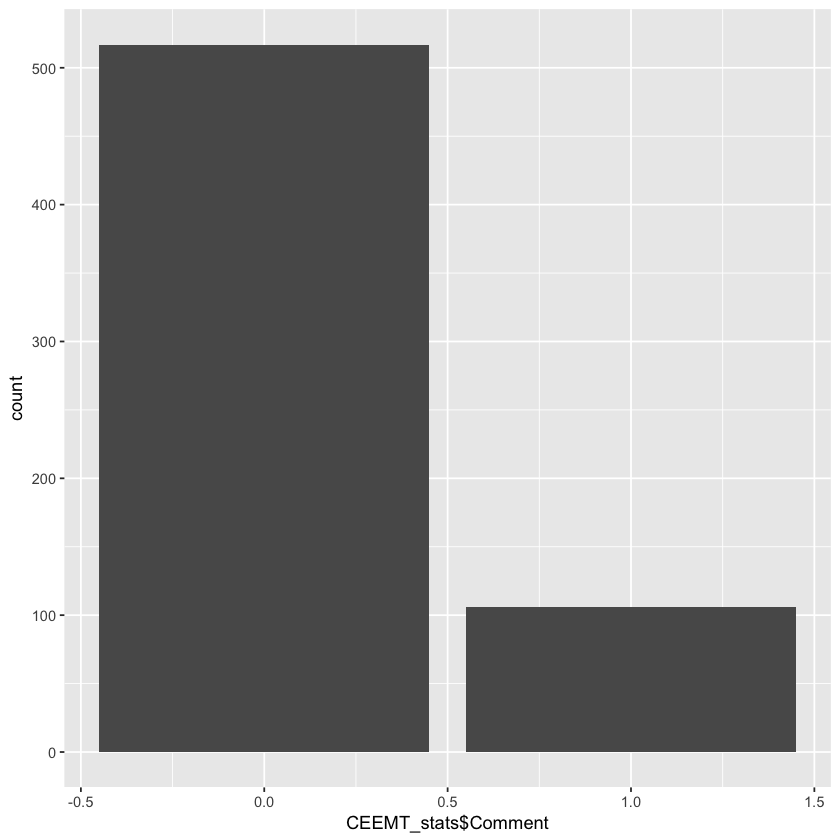

In [57]:
ggplot(CEEMT_stats, aes(x=CEEMT_stats$Comment)) + geom_bar()

In [58]:
CEEMT_stats <- filter(CEEMT_stats, CEEMT_stats$Comment == 0)

summary(CEEMT_stats)

       ID             Year         Author             Title          
 Min.   :  1.0   Min.   :1506   Length:517         Length:517        
 1st Qu.: 76.0   1st Qu.:1650   Class :character   Class :character  
 Median :155.0   Median :1674   Mode  :character   Mode  :character  
 Mean   :192.3   Mean   :1680                                        
 3rd Qu.:309.0   3rd Qu.:1727                                        
 Max.   :458.0   Max.   :1800                                        
    Comment    Version         
 Min.   :0   Length:517        
 1st Qu.:0   Class :character  
 Median :0   Mode  :character  
 Mean   :0                     
 3rd Qu.:0                     
 Max.   :0                     

In [59]:
CEEMT_stats <- select(CEEMT_stats, 'ID','Year','Author','Title','Version')

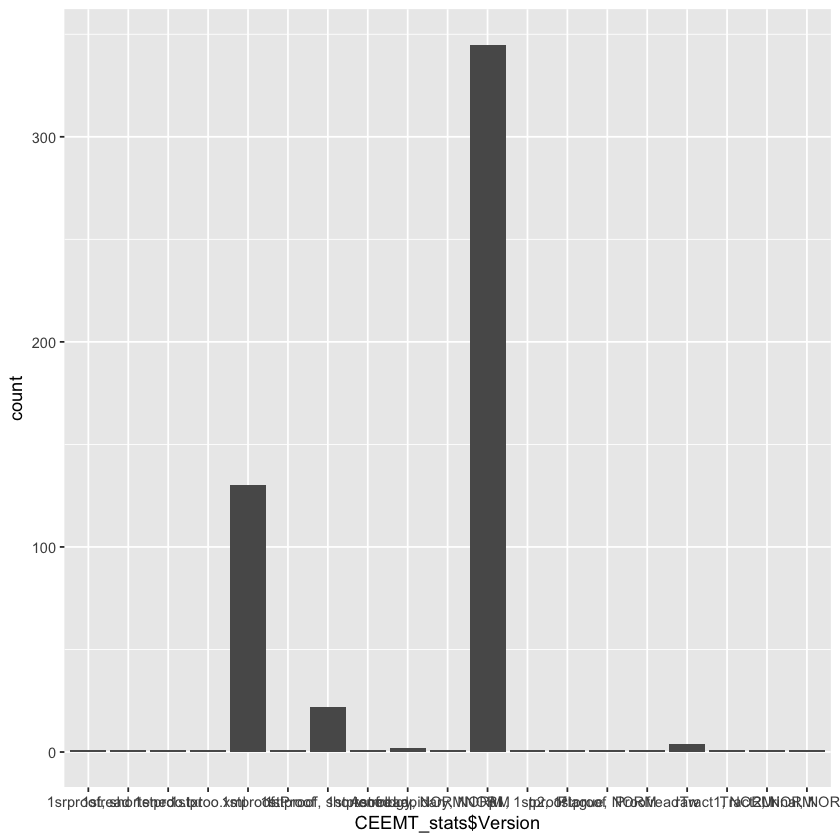

In [60]:
ggplot(CEEMT_stats, aes(x=CEEMT_stats$Version)) + geom_bar()

In [61]:
CEEMT_unique <- select(CEEMT_stats,'Year','Author','Title') %>%
    distinct()


summary(CEEMT_unique)

      Year         Author             Title          
 Min.   :1506   Length:512         Length:512        
 1st Qu.:1650   Class :character   Class :character  
 Median :1674   Mode  :character   Mode  :character  
 Mean   :1680                                        
 3rd Qu.:1727                                        
 Max.   :1800                                        

It seems that five texts in the CEEMT had different versions in the corpus. Filtering the duplicates out does not change the mean.

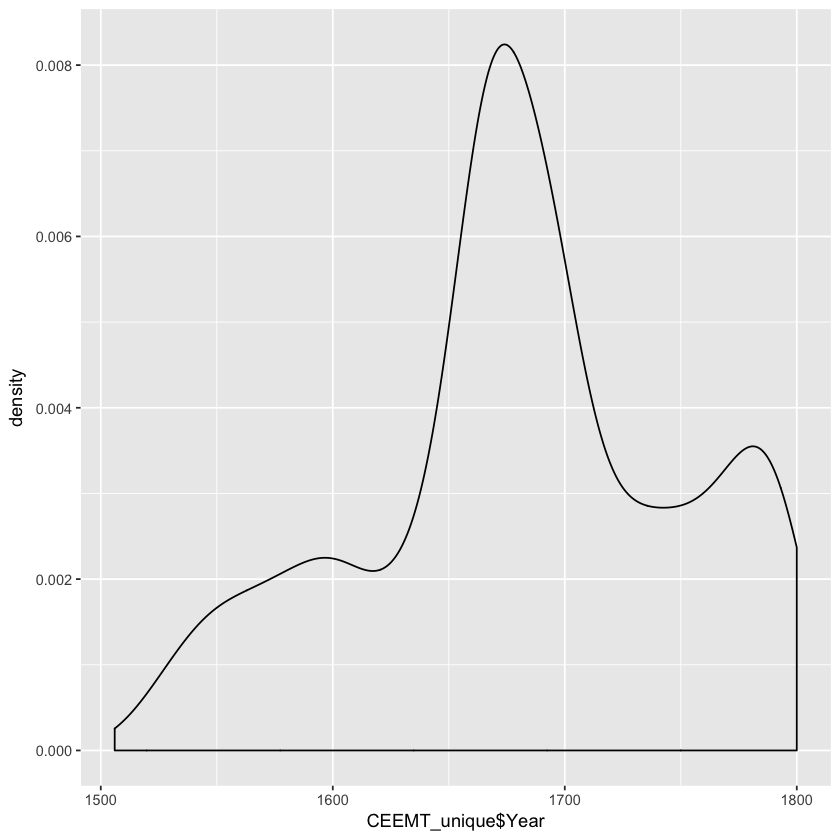

In [62]:
ggplot(CEEMT_unique, aes(x=CEEMT_unique$Year)) + geom_density(kernel='gaussian')

The density graph of the CEEMT differs from the density graphs of the CLMET and ARCHER, since there is a big peak around 1650 that cannot be observed in the CLMET or the ARCHER. This peak can be caused by the fact that the CEEMT is only about medical texts, whereas ARCHER and CLMET cover a broader spectrum of genres.

**RIDGES**

In [68]:
summary(RIDGES_meta)

       X           ID             Year            Author  
 Min.   :0   Min.   : 1.00   Min.   :1482   Brunfels : 5  
 1st Qu.:0   1st Qu.:15.25   1st Qu.:1539   Anonymous: 4  
 Median :0   Median :29.50   Median :1639   Tallat   : 4  
 Mean   :0   Mean   :29.50   Mean   :1661   Bock     : 3  
 3rd Qu.:0   3rd Qu.:43.75   3rd Qu.:1788   Rhagor   : 3  
 Max.   :0   Max.   :58.00   Max.   :1914   Cuba     : 2  
                                            (Other)  :37  
                                      Title   
 Alchymistische Practic                  : 1  
 Alchymistische Practic- V R             : 1  
 Apothekerlexikon                        : 1  
 Artzney Buchlein Der Kreutter           : 1  
 Artzney Buchlein Der Kreutter- Abrotanum: 1  
 Artzney Buchlein Der Kreutter- Centaurea: 1  
 (Other)                                 :52  

The mean year of the RIDGES corpus is very similar to the mean year of the CEEMT, the difference between both means is 19 years. The mean age of both RIDGES and CEEMT is larger than thpee mean age of the other corpora, and both RIGDES and CEEMT are specialised on medical texts. Therefore, it makes sense to pair those two corpora for a data-driven analysis, since the findings can be compared better than, for example, between CEEMT and DTA.

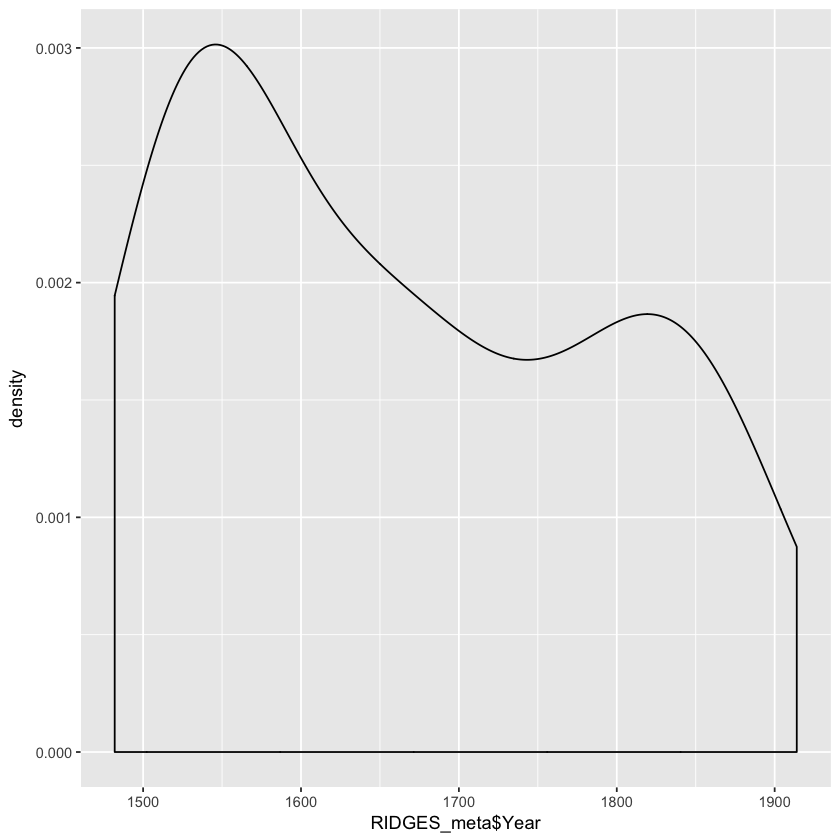

In [69]:
ggplot(RIDGES_meta, aes(x=RIDGES_meta$Year)) + geom_density(kernel='gaussian')

The density graph shows that RIDGES also covers younger texts as the CEEMT does, but it also has a large peak around 1550, which is about 100 years before the CEEMT has its peak. The fact that RIDGES is a very small corpora has to be taken into consideration, because this means that a heavy peak needs much less documents for showing up than it does in the larger CEEMT.

In [71]:
RIDGES_years_bin <- select(RIDGES_meta, 'ID', 'Year') %>%
    mutate('upper_bound' = 1919 - trunc((1919-Year)/10) * 10) %>%
    mutate('lower_bound' = upper_bound - 9) %>%
    select(ID, Year, lower_bound, upper_bound) %>%
    mutate('range' = as.factor(paste(as.character(lower_bound), as.character(upper_bound), sep='-')))

head(RIDGES_years_bin)

ID,Year,lower_bound,upper_bound,range
1,1603,1600,1609,1600-1609
2,1603,1600,1609,1600-1609
3,1793,1790,1799,1790-1799
4,1532,1530,1539,1530-1539
5,1532,1530,1539,1530-1539
6,1532,1530,1539,1530-1539


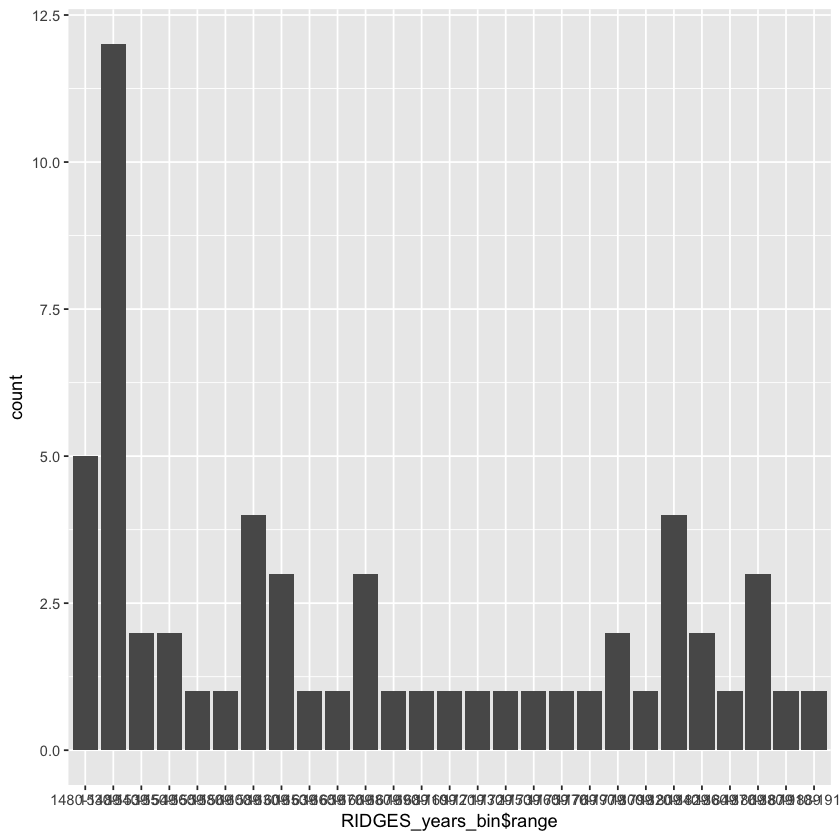

In [73]:
ggplot(RIDGES_years_bin, aes(x=RIDGES_years_bin$range)) + geom_bar()

This graph shows that RIDGES contains only one document for most decades, which means that it is difficult to get a representative result when using RIDGES for a data-driven analysis.